# Анализ эффективности образовательных курсов и возможности их улучшения.


<br><br>
**Описание работы:**

На основании имеющихся данных подготовим аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. Рассчитаем необходимые показатели,  оценим потенциальную нагрузку на преподавателей, проанализируем качество контента курсов, выявим проблемные модули. Разработаем метрику успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса.

<br><br>

________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br>
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br>
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными




_____________________________________________________________________


Для начала загрузим данные в ноутбук. Я уже разместил их на диске, теперь загрузим их сюда чтобы ноубук стал автономным.

https://drive.google.com/file/d/1S0-CXS3OkYiVnxFnjDCzMeMofxJhwC3h/view?usp=sharing

https://drive.google.com/file/d/1HhcV56nbS7J98NcTgaMUDMndD_T01suz/view?usp=sharing

https://drive.google.com/file/d/1DCNn__bZi7V74sEOkZolNbwNNTqoueOK/view?usp=sharing

https://drive.google.com/file/d/1yRVUfRD038MKokXTpL7mLUd-1zeazOSr/view?usp=sharing

https://drive.google.com/file/d/1FvDBekoeCxne22i4d7G-qf15qhA3fa4W/view?usp=sharing

In [ ]:
! gdown --id 1S0-CXS3OkYiVnxFnjDCzMeMofxJhwC3h

Downloading...
From: https://drive.google.com/uc?id=1S0-CXS3OkYiVnxFnjDCzMeMofxJhwC3h
To: /content/course_contents.csv
100% 227k/227k [00:00<00:00, 33.3MB/s]


In [ ]:
! gdown --id 1HhcV56nbS7J98NcTgaMUDMndD_T01suz

Downloading...
From: https://drive.google.com/uc?id=1HhcV56nbS7J98NcTgaMUDMndD_T01suz
To: /content/courses.csv
100% 1.24k/1.24k [00:00<00:00, 2.01MB/s]


In [ ]:
! gdown --id 1DCNn__bZi7V74sEOkZolNbwNNTqoueOK

Downloading...
From: https://drive.google.com/uc?id=1DCNn__bZi7V74sEOkZolNbwNNTqoueOK
To: /content/progress_phases.csv
100% 35.3M/35.3M [00:00<00:00, 112MB/s] 


In [ ]:
! gdown --id 1yRVUfRD038MKokXTpL7mLUd-1zeazOSr

Downloading...
From: https://drive.google.com/uc?id=1yRVUfRD038MKokXTpL7mLUd-1zeazOSr
To: /content/progresses.csv
100% 1.58M/1.58M [00:00<00:00, 80.6MB/s]


In [ ]:
! gdown --id 1FvDBekoeCxne22i4d7G-qf15qhA3fa4W

Downloading...
From: https://drive.google.com/uc?id=1FvDBekoeCxne22i4d7G-qf15qhA3fa4W
To: /content/students.csv
100% 2.28M/2.28M [00:00<00:00, 72.6MB/s]


Импортируем основные бибилиотеки.

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt




Загрузим и объединим датасеты (кроме `students.scv`) в один общий для дальнейшей работы.

In [ ]:
df1 = pd.read_csv('/content/courses.csv')
df1

,Unnamed: 0,id,title,field
0,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
1,1,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design
2,2,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business
3,3,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business
4,4,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development
5,5,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development
6,6,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,Design
7,7,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
8,8,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,Design
9,9,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing


In [ ]:
df2 = pd.read_csv('/content/course_contents.csv')
df2

,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework
0,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",1,Знакомство,aa344de3-1191-4e69-b485-61823118f71c,True,False
1,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",2,"Введение в Motion Design. Тренды, разновидност...",246c8429-dd18-4f3a-a9fb-d3c07e7d6912,True,False
2,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",3,Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True
3,04ba6d0b40670c43a209141fa01fa784,2,12 принципов анимации от Walt Disney Studio,1,Интро,7ea16a2d-e6d1-4158-907f-ae0ce8379c45,True,False
4,04ba6d0b40670c43a209141fa01fa784,2,12 принципов анимации от Walt Disney Studio,2,12 принципов анимации,7eea2930-11db-45c9-a16c-0d800b6dc99d,True,False
...,...,...,...,...,...,...,...,...
1196,e9bb9205eeed307ee7cbaa08bfd166c3,16,Redux,7,Домашняя работа,b1ce1072-92b3-4d7a-afd8-8322bbc22fe8,False,True
1197,e9bb9205eeed307ee7cbaa08bfd166c3,17,Бонус,1,Библиотеки и фреймворки 2017,f29f2db3-af26-4515-9709-6e56c0f72bbc,True,False
1198,e9bb9205eeed307ee7cbaa08bfd166c3,17,Бонус,2,Развитие стандарта ECMAScript,c05eb822-d732-49c2-bb6c-61a023b5af11,True,False
1199,e9bb9205eeed307ee7cbaa08bfd166c3,17,Бонус,3,Тестирование кода,34f79860-e127-4e09-852d-6bbba205ee68,True,False


In [ ]:
df3 = pd.read_csv('/content/progress_phases.csv')
df3

,progress_id,module_number,lesson_number,status,start_date,finish_date
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00
...,...,...,...,...,...,...
350672,ea9c93865c1de54a5079b7ae71c88683,3,2,start,2019-07-16 23:02:33.4829+00,NaN
350673,ea9c93865c1de54a5079b7ae71c88683,2,4,done,2019-07-02 15:34:32.134806+00,2019-07-02 16:32:15.491277+00
350674,ea9c93865c1de54a5079b7ae71c88683,2,3,done,2019-07-01 21:46:27.908354+00,2019-07-01 21:48:04.806799+00
350675,ea9c93865c1de54a5079b7ae71c88683,2,2,done,2019-06-30 22:41:33.705765+00,2019-07-01 07:44:00.370798+00


In [ ]:
df4 = pd.read_csv('/content/progresses.csv')
df4

,id,student_id,course_id
0,8459fbc07e32ec92bd7b43d7df9bfa89,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1
1,a9d173142534e33ce39146017f9c6835,e24062de06d301937b3b3a8e383e3e21,bf27a4bf4ada4c756451703ea62a914f
2,da26551a71cd62bbab844e3e54af7f71,35a36d90b745992b59085c8d54a072e7,6e4837f0a65c68efbfdd0594d6774701
3,cda22f5fb5b5dcfad42b59b91b1938dc,37e8e8179295ae764524223086b0b568,abce125a877c2196a3bc7bfbc11b5fc5
4,5ead083521d7f2284a43290c743aa93b,37e8e8179295ae764524223086b0b568,17013cd19d25cb3f28dc1b2683721bb9
...,...,...,...
15929,6a9da95f3d4a6df407df8fd65e2ad971,a9e1b3b7afd461fdf1c3c1f12eb15f0e,e3a0df907589d56692b5cb561fd90d87
15930,9940d453241ec849e3efcf53606fcda6,0f12abf574cff459768ec97e236f8f01,ccbab00e99b27f83369d6cc89d914ad6
15931,bcfb5cb5c1b26232ebdc831047106271,e2eacf5b3bb299f535fb48fe29f2daf2,bf27a4bf4ada4c756451703ea62a914f
15932,eef3897f44bf1e0c3a196a1abf4e938b,880e5d95c043a0bc343c238030b8c8a6,e3a0df907589d56692b5cb561fd90d87


In [ ]:
df5 = pd.read_csv('/content/students.csv')
df5

,id_,id,city,birthday
0,1325,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaN
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
2,8972,2033122d7c9b24b36eebc468d5259642,NaN,NaN
3,9235,a6ae278c0eab719b3784e5ea147c128f,Москва,NaN
4,9588,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaN
...,...,...,...,...
43825,124251,a65ccacbe0226b345f195d02e676aa04,NaN,2000-11-21
43826,124338,148f1375e4135e779053a0d4b2a63857,NaN,1999-10-20
43827,124363,05fa419f832fa78ad6e7a5f90b0f71e6,NaN,NaN
43828,124377,9ff58c490f6ee5b013e7f62140ee3d79,NaN,1998-04-18


При объединении таблиц, может получиться так, что мы размножим строки лишний раз. Для того, чтобы это избежать укажем тип присоединения как left join, что позволит расширять уже имеющиеся строки новыми данными. Самое главное это прогрессы, на них мы будем постепенно нанизывать остальные таблицы, увеличивая количество колонок у одних и тех же строк.

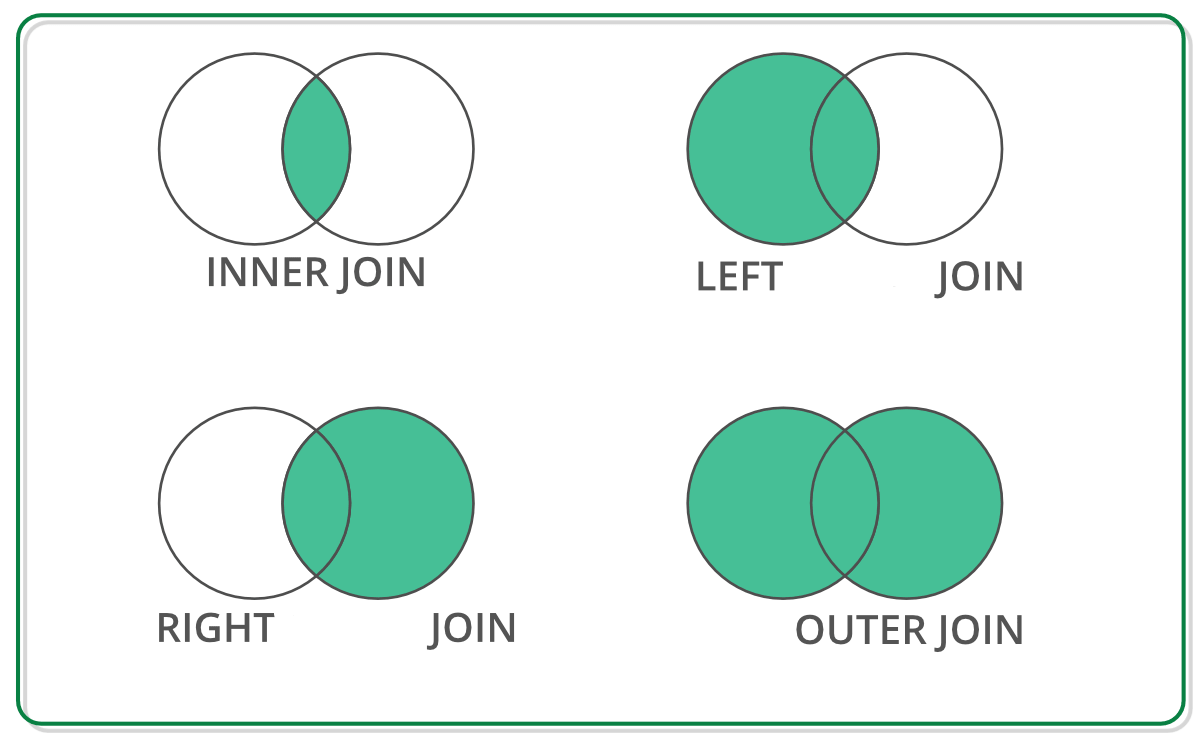

Главный датафрейм назовём просто df. Начнём с того, что расширим таблицу прогрессов идентификатором студента и идентификатором курса, для этого присоединим к таблице прогрессов (df3) таблицу с идентификатором курсов и студентов (df4).

In [ ]:
df = df3.merge(df4, how = 'left', left_on='progress_id', right_on = 'id')

In [ ]:
df

,progress_id,module_number,lesson_number,status,start_date,finish_date,id,student_id,course_id
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,a387ab916f402cb3fbfffd29f68fd0ce,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,a387ab916f402cb3fbfffd29f68fd0ce,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,a387ab916f402cb3fbfffd29f68fd0ce,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,a387ab916f402cb3fbfffd29f68fd0ce,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,a387ab916f402cb3fbfffd29f68fd0ce,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
...,...,...,...,...,...,...,...,...,...
350672,ea9c93865c1de54a5079b7ae71c88683,3,2,start,2019-07-16 23:02:33.4829+00,NaN,ea9c93865c1de54a5079b7ae71c88683,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f
350673,ea9c93865c1de54a5079b7ae71c88683,2,4,done,2019-07-02 15:34:32.134806+00,2019-07-02 16:32:15.491277+00,ea9c93865c1de54a5079b7ae71c88683,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f
350674,ea9c93865c1de54a5079b7ae71c88683,2,3,done,2019-07-01 21:46:27.908354+00,2019-07-01 21:48:04.806799+00,ea9c93865c1de54a5079b7ae71c88683,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f
350675,ea9c93865c1de54a5079b7ae71c88683,2,2,done,2019-06-30 22:41:33.705765+00,2019-07-01 07:44:00.370798+00,ea9c93865c1de54a5079b7ae71c88683,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f


Невооружённым взглядом видно, что колонки progress_id и id совпадают, поэтому слияние произошло правильно.
Удалим колонку id так как она больше не нужна, её дублирует progress_id.

In [ ]:
del df['id']

In [ ]:
df

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
...,...,...,...,...,...,...,...,...
350672,ea9c93865c1de54a5079b7ae71c88683,3,2,start,2019-07-16 23:02:33.4829+00,NaN,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f
350673,ea9c93865c1de54a5079b7ae71c88683,2,4,done,2019-07-02 15:34:32.134806+00,2019-07-02 16:32:15.491277+00,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f
350674,ea9c93865c1de54a5079b7ae71c88683,2,3,done,2019-07-01 21:46:27.908354+00,2019-07-01 21:48:04.806799+00,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f
350675,ea9c93865c1de54a5079b7ae71c88683,2,2,done,2019-06-30 22:41:33.705765+00,2019-07-01 07:44:00.370798+00,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f


Теперь, расширим датафрейм таблицей с информацией о курсах (df1)

In [ ]:
df = df.merge(df1, left_on='course_id', right_on='id')

In [ ]:
df

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,Unnamed: 0,id,title,field
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,7,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,7,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,7,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,7,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,7,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
...,...,...,...,...,...,...,...,...,...,...,...,...
350672,1f85423dc45ff6b70d4dcc799ef09cff,5,8,done,2019-06-08 13:14:53.892523+00,2019-06-09 13:26:16.284324+00,aa28498a5eee409e411f70c52fefed0a,943306102e5b067d08a29094f37b8193,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
350673,1f85423dc45ff6b70d4dcc799ef09cff,7,2,done,2019-07-13 09:05:27.92627+00,2019-07-15 12:34:25.289687+00,aa28498a5eee409e411f70c52fefed0a,943306102e5b067d08a29094f37b8193,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
350674,1f85423dc45ff6b70d4dcc799ef09cff,5,3,done,2019-05-25 15:10:43.601314+00,2019-05-25 15:18:24.221121+00,aa28498a5eee409e411f70c52fefed0a,943306102e5b067d08a29094f37b8193,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
350675,1f85423dc45ff6b70d4dcc799ef09cff,1,1,done,2019-03-26 18:20:25.9187+00,2019-03-26 19:12:17.601523+00,aa28498a5eee409e411f70c52fefed0a,943306102e5b067d08a29094f37b8193,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development


Колонки с id курсов совпадают, удалим колонки 'id' так как она теперь дублируется 'course_id' и 'Unnamed: 0' т.к. это бывшие индексы.

In [ ]:
del df['id']

In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
...,...,...,...,...,...,...,...,...,...,...
350672,1f85423dc45ff6b70d4dcc799ef09cff,5,8,done,2019-06-08 13:14:53.892523+00,2019-06-09 13:26:16.284324+00,aa28498a5eee409e411f70c52fefed0a,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
350673,1f85423dc45ff6b70d4dcc799ef09cff,7,2,done,2019-07-13 09:05:27.92627+00,2019-07-15 12:34:25.289687+00,aa28498a5eee409e411f70c52fefed0a,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
350674,1f85423dc45ff6b70d4dcc799ef09cff,5,3,done,2019-05-25 15:10:43.601314+00,2019-05-25 15:18:24.221121+00,aa28498a5eee409e411f70c52fefed0a,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
350675,1f85423dc45ff6b70d4dcc799ef09cff,1,1,done,2019-03-26 18:20:25.9187+00,2019-03-26 19:12:17.601523+00,aa28498a5eee409e411f70c52fefed0a,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development


Осталось добавить данные из таблицы о контенте уроков, посколько совпадений по одному столбцу недостаточно, нужно будет использовать соединение сразу по трём стоблцам: "module_number",	"lesson_number" и "course_id".

In [ ]:
df = df.merge(df2, on =['module_number', "lesson_number", 'course_id'])

In [ ]:
df

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,3b9dce04f32da32763124602557f92a3,2,4,done,2019-03-18 14:23:17.328374+00,2019-03-18 14:54:50.979612+00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
2,73e17a05355852fe65b785c82c37d1ad,2,4,done,2019-07-09 09:18:46.19862+00,2019-07-11 08:03:09.222385+00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
3,cc3eb34ae49c719648352c4175daee88,2,4,done,2018-07-27 15:39:17.666629+00,2018-07-27 16:13:55.086871+00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
4,04ace4fe130d90c801e24eea13ee808e,2,4,done,2019-04-24 18:42:40.272854+00,2019-04-24 18:44:57.507857+00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350672,7c46c781a54bf9d17f24b4920df4f7eb,9,14,start,2019-07-03 18:46:02.766878+00,NaN,1a0acf593d0a38155bafdf29e3cba338,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True
350673,56a9cb904c20cd2fcfa8104f87f988a7,9,14,wait,2019-07-09 05:44:55.574679+00,NaN,ed93dfa830d97cf67eb047dd7a4aa181,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True
350674,f6216204f2c65eea37f913cfa5e4eb6a,9,15,done,2019-07-03 09:49:03.510925+00,2019-07-03 18:22:44.796645+00,c21fa1f7fa61d11253e4cc8eeeb03027,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False
350675,45289b36f4827d49d9d3757fc9486ca0,9,15,done,2019-07-11 12:18:11.684534+00,2019-07-11 17:46:08.426039+00,4e5f1ba884ba5759c07cf6e942ae5e98,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False


## 1. Расчёт основных показателей.

Общее количество курсов в датасете

In [ ]:
df.nunique()['title']

15

Количество модулей на каждом курсе

In [ ]:
df.groupby('title').nunique()['module_number']

title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_number, dtype: int64

Количество уроков в каждом модуле на каждом курсе

In [ ]:
df.groupby(['title', 'module_title'])['lesson_number'].nunique()

title                          module_title                                       
Excel Базовый                   Визуализация данных Excel                              5
                               Основной функционал Excel                              11
                               Основной функционал Excel (продолжение)                 7
                               Сводные таблицы Excel                                   5
                               Формулы и функции Excel. Более сложные формулы          5
                                                                                      ..
Руководитель digital-проектов  Решение факапов. Lean/TOC. Обзор.                       5
                               Требовательность digital-продюсера                      4
                               Управление временем                                     4
                               Управление дизайнерами. Разработка дизайна по scrum     7
                           

Медианное количество уроков в модуле на каждом курсе

In [ ]:
list(df.groupby(['title'])['lesson_number'])[0][1][269166]

4

In [ ]:
df.groupby(['title', 'module_title'])['lesson_number'].max().to_frame().reset_index().groupby('title').agg('median')

,lesson_number
title,
Excel Базовый,5.0
Java-разработчик,7.0
Java-разработчик c нуля,13.0
JavaScript с нуля,7.0
PHP-разработчик с 0 до PRO. Часть 1,4.0
SMM-маркетолог от А до Я,6.0
UX-дизайн,3.5
Анимация интерфейсов,3.0
Веб-вёрстка для начинающих 2.0,7.0


Количество учеников на каждом курсе посчитаем как количество уникальных id

In [ ]:
df.groupby(['title'])['student_id'].nunique()

title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                506
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
Name: student_id, dtype: int64

Проверим это дополнительно по курсу UX-дизайн.

In [ ]:
df[df['title'] == 'UX-дизайн'].nunique()

progress_id          1151
module_number          20
lesson_number          10
status                  4
start_date          22950
finish_date         21704
student_id           1151
course_id               1
title                   1
field                   1
module_title           20
lesson_title           65
lesson_token           73
is_video                2
is_homework             2
start_month_year       32
dtype: int64

Всё сходится

Пересчитаем количество уникальных студентов на каждом курсе другим способом. Через группировку по id.

Создадим датафрейм df_special, оставим в нём только нужные нам колонки 'title' и 'student_id'. Применим к ним группировку, чтобы можно было это сделать, добавим колонку count со значением 1.

In [ ]:
df_special = df[['title', 'student_id']]

In [ ]:
df_special['count'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_special = df_special.groupby(['title', 'student_id'])['count'].count().to_frame().reset_index()

Теперь у нас есть строки которые содержат название курса, уникальный id студента и сколько раз этот студент упоминается в курсе.

In [ ]:
df_special

,title,student_id,count
0,Excel Базовый,001b192f899a84496be98b41906246fc,12
1,Excel Базовый,006f0189ec657741ee4d53474c7a258d,45
2,Excel Базовый,0074621b6955733338ab0feb2a9a2100,28
3,Excel Базовый,0098ca12f73a56dadbf6099389305d80,47
4,Excel Базовый,00b374d9c1cc22543c4d9d3939a6fd8d,4
...,...,...,...
15924,Руководитель digital-проектов,fd3a3ed82b4e1ea88680494282c4d7ca,14
15925,Руководитель digital-проектов,fde85e2be0df5bd3a136489033593677,3
15926,Руководитель digital-проектов,ff0f96efc5bc705cd50cda0baa15a879,4
15927,Руководитель digital-проектов,ff5e8cdf1578fda9a8128520c3c215bb,4


Поскольку нам неважно, сколько раз студент встречается в курсе, а наоборот, нужно определить сколько всего на курсе уникальных студентов, мы перезапишем колонку count поставив везде единицы. Теперь напротив каждого уникального id студента стоит 1. Суммируем количество таких единиц по каждому курсу и получим количество уникальных студентов на нём.

In [ ]:
df_special['count'] = 1

In [ ]:
df_special.groupby('title').sum()

,count
title,
Excel Базовый,782
Java-разработчик,763
Java-разработчик c нуля,581
JavaScript с нуля,966
PHP-разработчик с 0 до PRO. Часть 1,854
SMM-маркетолог от А до Я,506
UX-дизайн,1151
Анимация интерфейсов,598
Веб-вёрстка для начинающих 2.0,2004


Получились те же значения что и до этого, эти числа представляют собой количество уникальных id на каждом курсе.

Теперь перейдём к нахождению возраста студентов, для этого потребуются преобразования над таблицей с данными студентов (df5)

Минимальный, максимальный, средний, медианный возраст студентов

In [ ]:
df5

,id_,id,city,birthday
0,1325,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaN
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
2,8972,2033122d7c9b24b36eebc468d5259642,NaN,NaN
3,9235,a6ae278c0eab719b3784e5ea147c128f,Москва,NaN
4,9588,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaN
...,...,...,...,...
43825,124251,a65ccacbe0226b345f195d02e676aa04,NaN,2000-11-21
43826,124338,148f1375e4135e779053a0d4b2a63857,NaN,1999-10-20
43827,124363,05fa419f832fa78ad6e7a5f90b0f71e6,NaN,NaN
43828,124377,9ff58c490f6ee5b013e7f62140ee3d79,NaN,1998-04-18


Сохраним данные о студентах в отдельном датафрейме df_students

In [ ]:
df_students = df5.copy()

Нам нужно удалить пропуски в датах рождения, но в стобце city очень много пропусков, поэтому удалим сначала его чтобы сохранить нужные данные

In [ ]:
del df_students['city']

In [ ]:
del df_students['id_']

In [ ]:
del df5['id_']

In [ ]:
df_students = df_students.dropna()


Для определения возраста понадобятся: сегодняшняя дата и даты рождения студентов в формате datetime, почему-то мне не удалось преобразовать данные столбца birthday в datetime при чтении файла

In [ ]:
dt.datetime.now()

datetime.datetime(2021, 11, 5, 11, 36, 48, 409862)

Обнаружилось, что ещё 9 записей в стоблце birthday неправильного формата, поэтому удалим их

In [ ]:
pd.to_datetime(df_students['birthday'], errors='coerce').isnull().sum()

9

In [ ]:
pd.to_datetime(df_students['birthday'], errors='coerce').dropna()

1       1979-10-23
7       1991-08-15
8       1987-08-24
11      1988-07-16
15      1991-01-16
           ...    
43821   1993-02-16
43824   1994-04-24
43825   2000-11-21
43826   1999-10-20
43828   1998-04-18
Name: birthday, Length: 25490, dtype: datetime64[ns]

In [ ]:
df_students['age_days'] = dt.datetime.now() - pd.to_datetime(df_students['birthday'], errors='coerce').dropna()

И удалим также 9 студентов у которых был неправильно указан день рождения

In [ ]:
df_students = df_students.dropna()

In [ ]:
df_students

,id,birthday,age_days
1,6c3e52be632fc50de9640147e4017dcd,1979-10-23,15354 days 11:36:48.477970
7,35a36d90b745992b59085c8d54a072e7,1991-08-15,11040 days 11:36:48.477970
8,37e8e8179295ae764524223086b0b568,1987-08-24,12492 days 11:36:48.477970
11,fb10649db552c5f451bea45ed754d428,1988-07-16,12165 days 11:36:48.477970
15,d15a188c90bb4d83957ac14de78fada4,1991-01-16,11251 days 11:36:48.477970
...,...,...,...
43821,75e54bba2c6a49602ae0547e1f990d21,1993-02-16,10489 days 11:36:48.477970
43824,afbc1ca2ed9ff60239c5d95e0df23856,1994-04-24,10057 days 11:36:48.477970
43825,a65ccacbe0226b345f195d02e676aa04,2000-11-21,7654 days 11:36:48.477970
43826,148f1375e4135e779053a0d4b2a63857,1999-10-20,8052 days 11:36:48.477970


In [ ]:
df_students['age'] = round(df_students['age_days'] / np.timedelta64(1, 'Y'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_students['city'] = df5['city']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_students

,id,birthday,age_days,age,city
1,6c3e52be632fc50de9640147e4017dcd,1979-10-23,15354 days 11:36:48.477970,42.0,Москва
7,35a36d90b745992b59085c8d54a072e7,1991-08-15,11040 days 11:36:48.477970,30.0,Красноярск
8,37e8e8179295ae764524223086b0b568,1987-08-24,12492 days 11:36:48.477970,34.0,Москва
11,fb10649db552c5f451bea45ed754d428,1988-07-16,12165 days 11:36:48.477970,33.0,Санкт-Петербург
15,d15a188c90bb4d83957ac14de78fada4,1991-01-16,11251 days 11:36:48.477970,31.0,Санкт-Петербург
...,...,...,...,...,...
43821,75e54bba2c6a49602ae0547e1f990d21,1993-02-16,10489 days 11:36:48.477970,29.0,NaN
43824,afbc1ca2ed9ff60239c5d95e0df23856,1994-04-24,10057 days 11:36:48.477970,28.0,NaN
43825,a65ccacbe0226b345f195d02e676aa04,2000-11-21,7654 days 11:36:48.477970,21.0,NaN
43826,148f1375e4135e779053a0d4b2a63857,1999-10-20,8052 days 11:36:48.477970,22.0,NaN


Удалим явно некорректные данные: оставим возраст от 15 до 85 лет

In [ ]:
df_students = df_students[(df_students['age'] <= 85) & (df_students['age'] >= 15)]

Минимальный, максимальный, средний, медианный возраст студентов

In [ ]:
df_students['age'].apply([max, min, 'median'])

max       85.0
min       15.0
median    30.0
Name: age, dtype: float64

Данные о возрасте весьма различны, минимальный и максимальный возраст выбран от 15 до 85 соответственно, и именно такие значения мы и видим в датасете. Медианный возраст в 30 лет является довольно ожидаемым, посмотрим теперь данные по курсам.

минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [ ]:
df_students.merge(df, left_on = 'id', right_on = 'student_id').groupby('title')['age'].agg([min, max, 'median'])

,min,max,median
title,,,
Excel Базовый,18.0,62.0,35.0
Java-разработчик,16.0,66.0,30.0
Java-разработчик c нуля,16.0,57.0,31.0
JavaScript с нуля,15.0,61.0,30.0
PHP-разработчик с 0 до PRO. Часть 1,15.0,76.0,31.0
SMM-маркетолог от А до Я,19.0,54.0,30.0
UX-дизайн,17.0,59.0,32.0
Анимация интерфейсов,17.0,53.0,31.0
Веб-вёрстка для начинающих 2.0,15.0,61.0,29.0


Видим что значения более 70-ти лет пропали, теперь они больше не пиковые значения, вероятно студенты которые указали такие данные не проходят ни один курс, т.к. по умолчанию функция merge соединяет таблицы методом inner, это значит что остаются только те строки, которые были и в левой и в правой таблицах, т.к. эти студенты очевидно были в таблице students, их не было в таблице df, в которой указан весь прогресс учеников. Значит либо они не приступали ни к одному модулю, либо вообще не покупали курс, если возможно при этом оказаться в таблице.

В целом видим что на курсах довольно много молодых людей, хотя минимальный возраст ниже на веб-курсах, с другой стороны правдоподобными выглядят даные и о 50-ти, 60-ти летних студентов курсов.

## 2. Построим bar-chart, отражающий количество студентов на каждом курсе.

In [ ]:
df_1_2 = df.groupby(['title'])['student_id'].nunique().to_frame()

In [ ]:
df_1_2 = df_1_2.reset_index()

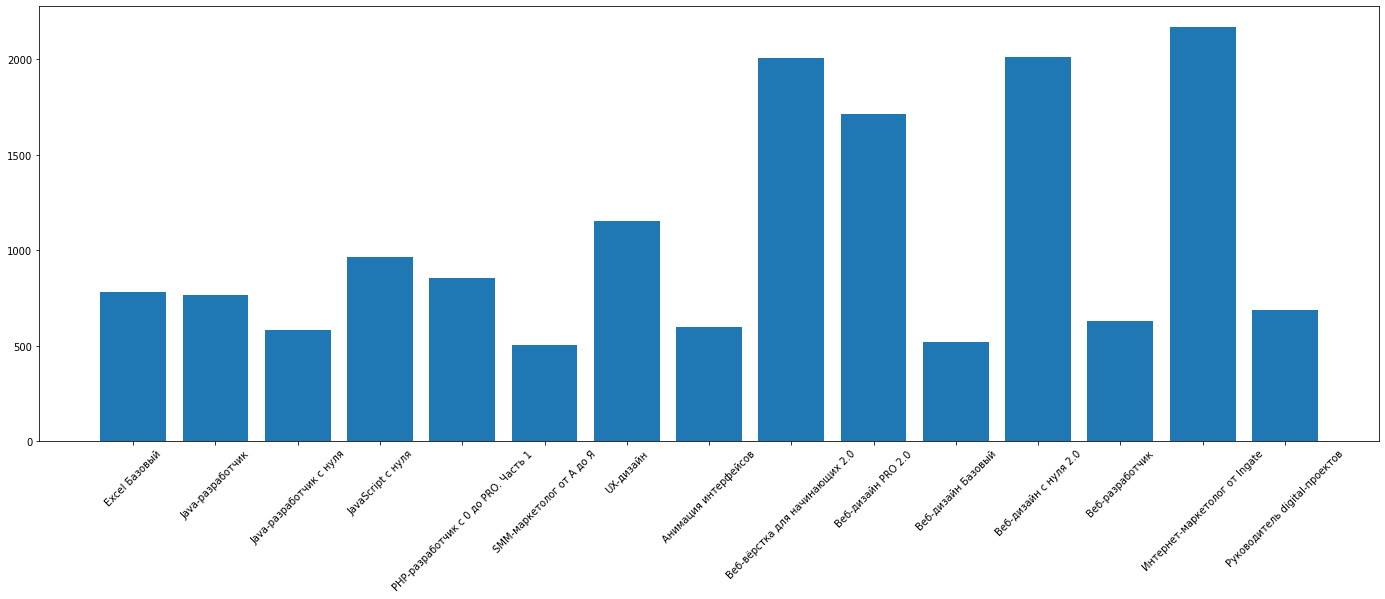

In [ ]:
fig, ax = plt.subplots(figsize = (24, 8))
data = df_1_2
ax.bar(data['title'], data['student_id'])
ax.tick_params(axis = 'x', rotation = 45)


## 3. Построем bar-chart, отражающий количество студентов на каждом курсе.

In [ ]:
df1_2_2 = df[['student_id', 'title', 'field']]

In [ ]:
df1_2_2 = df1_2_2.groupby(['title', 'field'])['student_id'].count()

In [ ]:
df1_2_2 = df1_2_2.to_frame()

In [ ]:
df1_2_2

,,student_id
title,field,
Excel Базовый,Business,18666
Java-разработчик,Development,24030
Java-разработчик c нуля,Development,14301
JavaScript с нуля,Development,20162
PHP-разработчик с 0 до PRO. Часть 1,Development,5995
SMM-маркетолог от А до Я,Marketing,7688
UX-дизайн,Design,23006
Анимация интерфейсов,Design,5937
Веб-вёрстка для начинающих 2.0,Development,29694


In [ ]:
df1_2_2 = df1_2_2.reset_index()
df1_2_2

,title,field,student_id
0,Excel Базовый,Business,18666
1,Java-разработчик,Development,24030
2,Java-разработчик c нуля,Development,14301
3,JavaScript с нуля,Development,20162
4,PHP-разработчик с 0 до PRO. Часть 1,Development,5995
5,SMM-маркетолог от А до Я,Marketing,7688
6,UX-дизайн,Design,23006
7,Анимация интерфейсов,Design,5937
8,Веб-вёрстка для начинающих 2.0,Development,29694
9,Веб-дизайн PRO 2.0,Design,17268


In [ ]:
df1_2_2.index = df1_2_2['title']

In [ ]:
df1_2_2 = df1_2_2.sort_values(by='student_id')

In [ ]:
titles = df1_2_2['title'].unique()

In [ ]:
def color(x):
  if x == 'Business':
    return "red"
  elif x == 'Development':
    return 'blue'
  elif x == 'Marketing':
    return 'green'
  else:
    return 'purple'

In [ ]:
df1_2_2['color'] = df1_2_2['field'].apply(color)

In [ ]:
df1_2_2[df1_2_2['title'] == 'Веб-разработчик'].index[0]

'Веб-разработчик'

In [ ]:
import matplotlib.patches as mpatches

In [ ]:
df1_2_2['field'].unique()

array(['Development', 'Design', 'Marketing', 'Business'], dtype=object)

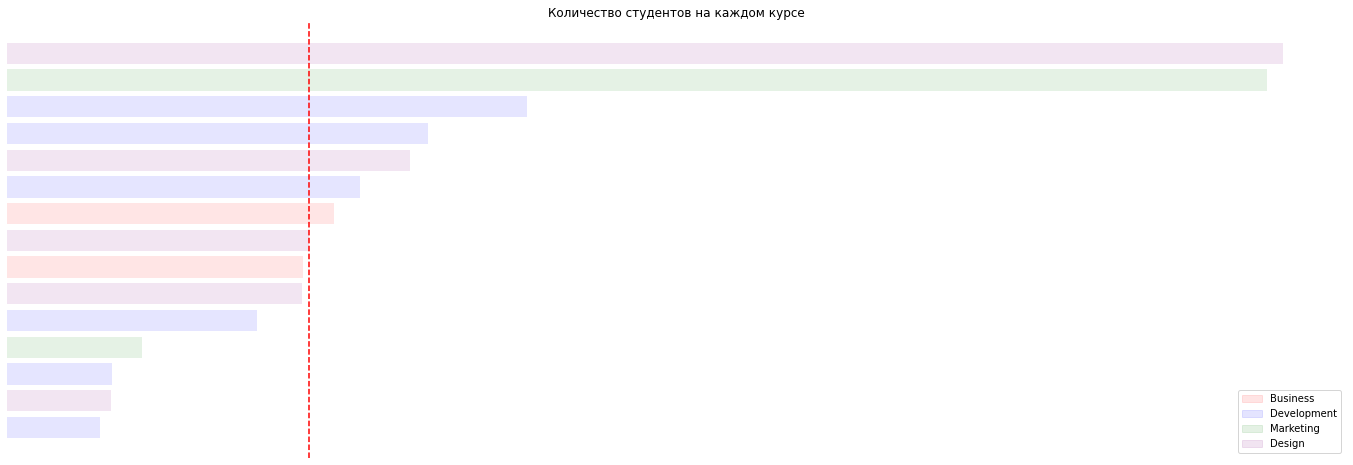

In [ ]:
fig, ax = plt.subplots(figsize = (24, 8), sharex = True)


for title in titles:
  data = df1_2_2[df1_2_2['title'] == title]
  ax.barh(data['title'], data['student_id'], alpha = 0.1, color=data['color'])
  handles = [data]
median=df1_2_2['student_id'].median()
plt.axvline(median, color='r', linestyle='--')
ax.tick_params(axis = 'x', rotation = 45)
ax.set_title('Количество студентов на каждом курсе')
ax.axis('off')
#ax.legend(['Development', 'Design', 'Marketing', 'Business'])
red_patch = mpatches.Patch(color='red', label= 'Business', alpha = 0.1)
blue_patch = mpatches.Patch(color='blue', label= 'Development', alpha = 0.1)
green_patch = mpatches.Patch(color='green', label= 'Marketing', alpha = 0.1)
purple_patch = mpatches.Patch(color='purple', label= 'Design', alpha = 0.1)
plt.legend(handles=[red_patch, blue_patch, green_patch, purple_patch])

## 4. Описание данных.

В нашем распоряжении данные о 15-ти курсах, каждый из которых включает различное число модулей - от 8 до 21. В каждом модуле чаще всего 3-4 урока. Количество студентов на курсах варьируется от 506 до 2168. Студенты не всегда указывают свой настоящий возраст, т.к. согласно данным к изучению современной профессии приступил 137 летний ветеран! Однако для нас надёжным показателем является медианный возраст студентов, составляющий 30 лет, что наталкивает на следующие выводы.
В skillbox приходят взрослые люди, скорее всего имеющие достаточную мотивацию. С другой стороны, если они приходят в абсолютно новую для себя сферу - им может понадобиться очень подробная программа, т.к. они уже сильно специализированы и скорее всего довольно давно не пользуются общими знаниями, полученными в школе и институте.
Интересно то, что, даже разбив средний возраст по курсам, мы видим ту же самую картину: он варьируется от 29 до 35 лет. Значит при принятии решений о совершенствовании курсов, ко всем курсам, с точки зрения возраста, может быть применим один и тот же подход.
Больше всего студентов идёт на курсы дизайна и маркетинга, меньше всего на профессии разработчиков. Интересно было бы проверить гипотезу о том, отражает ли это распределение реальные запросы людей, или низкий ажиотаж на профессии разработчиков связан с тем, что люди считают эти курсы сложными, боятся покупать их.

# 2. Расчет потенциальной нагрузки на преподавателей



## 1. Рассчитаем прирост студентов на каждом курсе в каждом месяце за всю историю. Будем считать дату начала прохождения курса студентом по дате начала первой домашней работы.

Добавим колонку, которая будет содержать только год и месяц от start_date

In [ ]:
df['start_time'] = pd.to_datetime(df['start_date'])

In [ ]:
df['start_month_year'] = df['start_time'].dt.to_period('M')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [ ]:
df

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework,start_time,start_month_year
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2018-06-23 08:28:50.681065+00:00,2018-06
1,3b9dce04f32da32763124602557f92a3,2,4,done,2019-03-18 14:23:17.328374+00,2019-03-18 14:54:50.979612+00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2019-03-18 14:23:17.328374+00:00,2019-03
2,73e17a05355852fe65b785c82c37d1ad,2,4,done,2019-07-09 09:18:46.19862+00,2019-07-11 08:03:09.222385+00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2019-07-09 09:18:46.198620+00:00,2019-07
3,cc3eb34ae49c719648352c4175daee88,2,4,done,2018-07-27 15:39:17.666629+00,2018-07-27 16:13:55.086871+00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2018-07-27 15:39:17.666629+00:00,2018-07
4,04ace4fe130d90c801e24eea13ee808e,2,4,done,2019-04-24 18:42:40.272854+00,2019-04-24 18:44:57.507857+00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2019-04-24 18:42:40.272854+00:00,2019-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350672,7c46c781a54bf9d17f24b4920df4f7eb,9,14,start,2019-07-03 18:46:02.766878+00,NaN,1a0acf593d0a38155bafdf29e3cba338,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07-03 18:46:02.766878+00:00,2019-07
350673,56a9cb904c20cd2fcfa8104f87f988a7,9,14,wait,2019-07-09 05:44:55.574679+00,NaN,ed93dfa830d97cf67eb047dd7a4aa181,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07-09 05:44:55.574679+00:00,2019-07
350674,f6216204f2c65eea37f913cfa5e4eb6a,9,15,done,2019-07-03 09:49:03.510925+00,2019-07-03 18:22:44.796645+00,c21fa1f7fa61d11253e4cc8eeeb03027,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False,2019-07-03 09:49:03.510925+00:00,2019-07
350675,45289b36f4827d49d9d3757fc9486ca0,9,15,done,2019-07-11 12:18:11.684534+00,2019-07-11 17:46:08.426039+00,4e5f1ba884ba5759c07cf6e942ae5e98,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False,2019-07-11 12:18:11.684534+00:00,2019-07


In [ ]:
del df['start_time']

Создадим датафрейм для решения этого задания, для этого оставим в нём только уроки с домашним заданием, с помощью функции min выясним, какой модуль имеет первое домашнее задание и оставим только строки с этим модулем. Затем соединим его с основным датафреймом оставляя только выбранные строки и посчитаем по ним прирост.

In [ ]:
df_growth = df[(df['is_homework'] == True)].groupby(['title'])['module_number'].agg(min).to_frame()
df_growth

,module_number
title,
Excel Базовый,1
Java-разработчик,1
Java-разработчик c нуля,1
JavaScript с нуля,1
PHP-разработчик с 0 до PRO. Часть 1,1
SMM-маркетолог от А до Я,1
UX-дизайн,1
Анимация интерфейсов,1
Веб-вёрстка для начинающих 2.0,1


In [ ]:
df_growth = df_growth.merge(df[df['is_homework'] == True], how='left', on=['title', 'module_number'])
df_growth

,title,module_number,progress_id,lesson_number,status,start_date,finish_date,student_id,course_id,field,module_title,lesson_title,lesson_token,is_video,is_homework,start_month_year
0,Excel Базовый,1,254e96b86d572b4685b06afd26941c3f,11,done,2018-12-10 16:15:15.891656+00,2018-12-12 10:17:59.8285+00,2364226ef29a6afef154dc8f5cef203d,ac634845fb0350d0e9d49078aaa4b68f,Business,Основной функционал Excel,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,2018-12
1,Excel Базовый,1,f11f4aa8914aec9f51feafa2b7b39a1b,11,done,2019-05-01 18:59:13.272997+00,2019-05-07 04:13:29.298187+00,c8620d7c8669b9ce5514b7e22b421f66,ac634845fb0350d0e9d49078aaa4b68f,Business,Основной функционал Excel,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,2019-05
2,Excel Базовый,1,eb09e4fda04ad88bc2ff8c85a17a323f,11,done,2018-11-29 17:32:22.257822+00,2018-12-02 16:34:48.86414+00,de4d367fb54ae3b088bcd5d757fdd95f,ac634845fb0350d0e9d49078aaa4b68f,Business,Основной функционал Excel,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,2018-11
3,Excel Базовый,1,9d3393fe7b21731f9904488a20d0609e,11,done,2019-04-03 12:05:44.802008+00,2019-04-05 08:31:32.867733+00,27a4affbd4faad18f7d108f8ff719dbb,ac634845fb0350d0e9d49078aaa4b68f,Business,Основной функционал Excel,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,2019-04
4,Excel Базовый,1,e9eec59e37bb88e9a3c65510e75d679e,11,done,2018-08-23 16:41:23.848277+00,2018-09-06 10:38:52.336251+00,35a96a3a2e6a0e4eef24fbd6786580c7,ac634845fb0350d0e9d49078aaa4b68f,Business,Основной функционал Excel,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10802,Руководитель digital-проектов,1,dcd72f12fea3f18492c8dc6755d72a1e,4,done,2018-04-25 10:04:21.924075+00,2018-04-26 07:37:25.209867+00,94d66c74d458208d29235029fb0ed549,0770b1b039964228294f1f34b29fc2c1,Business,Экологичный путь менеджера,Домашняя работа,8e0b5603-ecc4-46f0-9468-02df445089aa,False,True,2018-04
10803,Руководитель digital-проектов,1,385e72033e7ddfdb246f80aeccdf256f,4,done,2018-09-03 19:03:25.975177+00,2018-09-04 03:32:33.608175+00,29f09a9aabe1acf8affce163e7d57934,0770b1b039964228294f1f34b29fc2c1,Business,Экологичный путь менеджера,Домашняя работа,8e0b5603-ecc4-46f0-9468-02df445089aa,False,True,2018-09
10804,Руководитель digital-проектов,1,d6aecef2950da3d3caab8986a137f425,4,done,2019-06-24 20:12:37.536867+00,2019-06-27 10:23:37.583397+00,ed1264d17483d836e4924ad30abab674,0770b1b039964228294f1f34b29fc2c1,Business,Экологичный путь менеджера,Домашняя работа,8e0b5603-ecc4-46f0-9468-02df445089aa,False,True,2019-06
10805,Руководитель digital-проектов,1,39a5e743f944d87d4e2247709d297d64,4,done,2019-01-11 00:23:53.553998+00,2019-03-06 09:35:24.656357+00,b19327e2fd348d705ddc2d202d1b7f6d,0770b1b039964228294f1f34b29fc2c1,Business,Экологичный путь менеджера,Домашняя работа,8e0b5603-ecc4-46f0-9468-02df445089aa,False,True,2019-01


In [ ]:
df_growth = df_growth.groupby(['title', 'start_month_year'])['student_id'].count().to_frame()
df_growth

student_id
title                         start_month_year            
Excel Базовый                 2018-02                    6
                              2018-03                    3
                              2018-05                    3
                              2018-06                    9
                              2018-07                   13
...                                                    ...
Руководитель digital-проектов 2019-03                   36
                              2019-04                   17
                              2019-05                   25
                              2019-06                   15
                              2019-07                   20

[244 rows x 1 columns]

In [ ]:
df_growth.columns = ['growth']

Прирост (growth) студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно).

In [ ]:
df_growth.reset_index(inplace = True)

In [ ]:
df_growth.sort_values(['title', 'start_month_year'], inplace=True)

In [ ]:
df_growth

,title,start_month_year,growth
0,Excel Базовый,2018-02,6
1,Excel Базовый,2018-03,3
2,Excel Базовый,2018-05,3
3,Excel Базовый,2018-06,9
4,Excel Базовый,2018-07,13
...,...,...,...
239,Руководитель digital-проектов,2019-03,36
240,Руководитель digital-проектов,2019-04,17
241,Руководитель digital-проектов,2019-05,25
242,Руководитель digital-проектов,2019-06,15


## 2. Построим line-graph с приростом студентов в каждом месяце для каждого курса.

Создадим колонку с датой начала выполнения домашней работы вместо полного временного формата. То есть сократим секунды, минуты и т.д.

In [ ]:
df_growth['str_dates'] = list(df_growth['start_month_year'].apply(lambda x: x.strftime('%Y-%m')))

In [ ]:
df_growth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   title             244 non-null    object   
 1   start_month_year  244 non-null    period[M]
 2   growth            244 non-null    int64    
 3   str_dates         244 non-null    object   
dtypes: int64(1), object(2), period[M](1)
memory usage: 9.5+ KB


In [ ]:
df_growth.set_index('str_dates', inplace = True)

Список курсов у нас уже имеется.

In [ ]:
titles

array(['Веб-разработчик', 'Анимация интерфейсов',
       'PHP-разработчик с 0 до PRO. Часть 1', 'SMM-маркетолог от А до Я',
       'Java-разработчик c нуля', 'Веб-дизайн Базовый',
       'Руководитель digital-проектов', 'Веб-дизайн PRO 2.0',
       'Excel Базовый', 'JavaScript с нуля', 'UX-дизайн',
       'Java-разработчик', 'Веб-вёрстка для начинающих 2.0',
       'Интернет-маркетолог от Ingate', 'Веб-дизайн с нуля 2.0'],
      dtype=object)

Вот так выглядит датафрейм, если выбирать отдельный курс. Что мы и сделаем, пройдёмся по нему циклом выбирая отдельные курсы и нанося их на график.

In [ ]:
df_growth[df_growth['title'] == 'UX-дизайн']

,title,start_month_year,growth
str_dates,,,
2016-11,UX-дизайн,2016-11,2
2017-04,UX-дизайн,2017-04,1
2017-05,UX-дизайн,2017-05,1
2017-06,UX-дизайн,2017-06,1
2018-02,UX-дизайн,2018-02,61
2018-03,UX-дизайн,2018-03,61
2018-04,UX-дизайн,2018-04,41
2018-05,UX-дизайн,2018-05,53
2018-06,UX-дизайн,2018-06,25


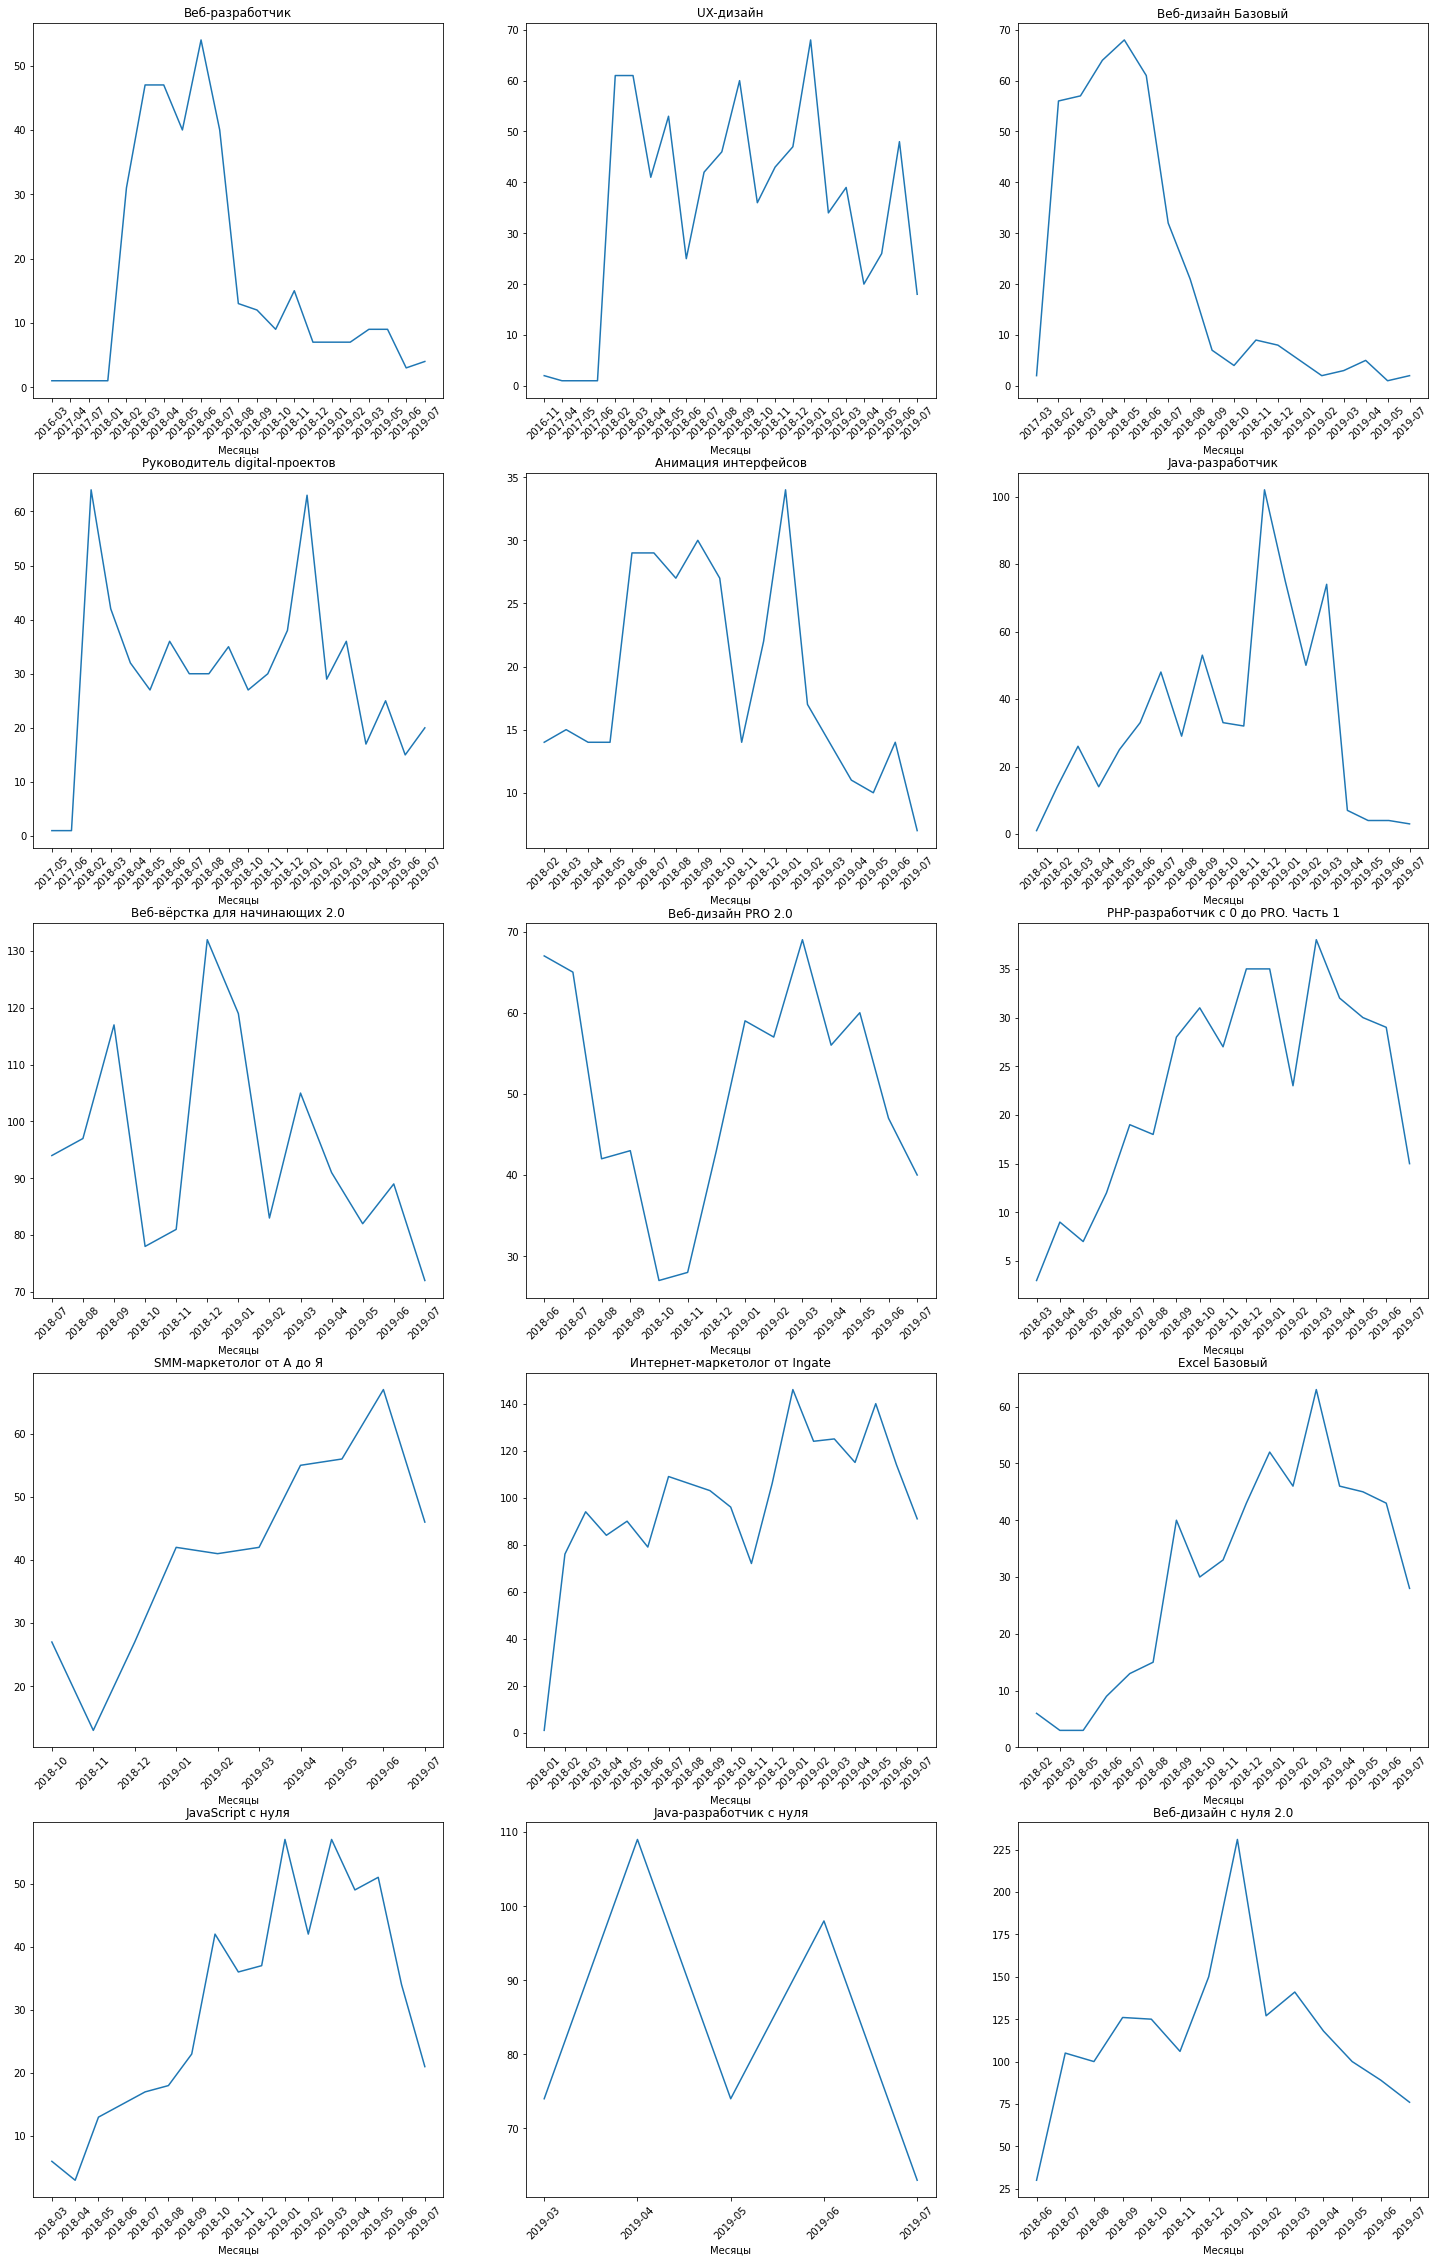

In [ ]:
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize = (25, 40)) #такой большой figure чтобы надписи на графиках не перекрывали друг друга
for n, title in enumerate(titles):
  data = df_growth[df_growth['title'] == title][['growth']]
  ax = axs[(round(n%5))][(round(n%3))]
  ax.plot(data['growth'])

  ax.set_title(f'{title}')
  ax.set_xlabel('Месяцы')
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)




## 3. Построим line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса.

In [ ]:
df_growth

,title,start_month_year,growth
str_dates,,,
2018-02,Excel Базовый,2018-02,6
2018-03,Excel Базовый,2018-03,3
2018-05,Excel Базовый,2018-05,3
2018-06,Excel Базовый,2018-06,9
2018-07,Excel Базовый,2018-07,13
...,...,...,...
2019-03,Руководитель digital-проектов,2019-03,36
2019-04,Руководитель digital-проектов,2019-04,17
2019-05,Руководитель digital-проектов,2019-05,25


Нужно перевести формат данных в datetime, я смог сделать это сначала переведя в str, затем в datetime

In [ ]:
ticks_list = list(df_growth.sort_values('start_month_year').index.unique())

In [ ]:
df_growth['str_dates'] = df_growth['start_month_year'].astype(str)
df_growth['datetime_dates'] = pd.to_datetime(df_growth['str_dates'])

In [ ]:
df_growth

,title,start_month_year,growth,str_dates,datetime_dates
str_dates,,,,,
2018-02,Excel Базовый,2018-02,6,2018-02,2018-02-01
2018-03,Excel Базовый,2018-03,3,2018-03,2018-03-01
2018-05,Excel Базовый,2018-05,3,2018-05,2018-05-01
2018-06,Excel Базовый,2018-06,9,2018-06,2018-06-01
2018-07,Excel Базовый,2018-07,13,2018-07,2018-07-01
...,...,...,...,...,...
2019-03,Руководитель digital-проектов,2019-03,36,2019-03,2019-03-01
2019-04,Руководитель digital-проектов,2019-04,17,2019-04,2019-04-01
2019-05,Руководитель digital-проектов,2019-05,25,2019-05,2019-05-01


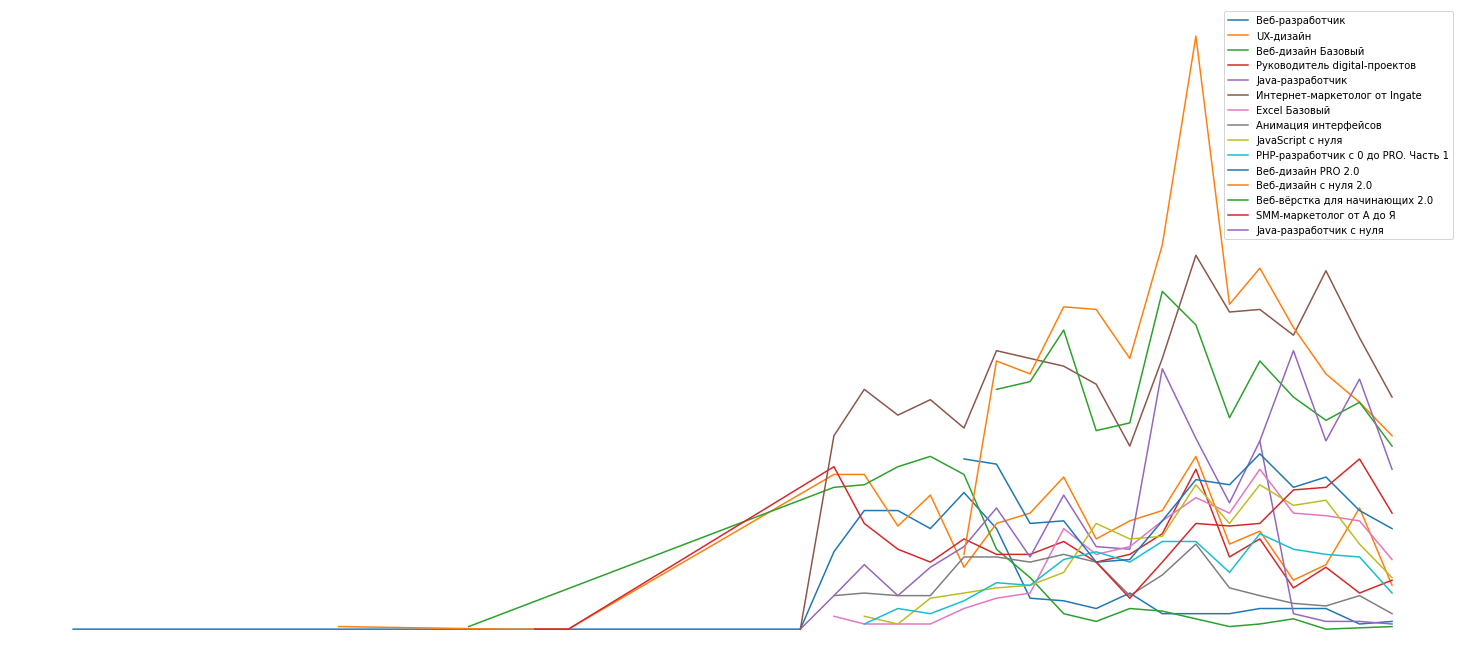

In [ ]:
fig, ax = plt.subplots(figsize = (26, 12), sharex = True)
titles = df_growth.groupby('title').min()['start_month_year'].sort_values().index.to_list()

for title in (titles):
  data = df_growth[df_growth['title'] == title]
  ax.plot(data['datetime_dates'], data['growth'], label = title)
ax.axis('off')
ax.legend()


## 4. Рассчитаем количество прогрессов по выполнению домашних работ в каждом месяце за всю историю для каждого курса.

In [ ]:
df

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework,start_month_year
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2018-06
1,3b9dce04f32da32763124602557f92a3,2,4,done,2019-03-18 14:23:17.328374+00,2019-03-18 14:54:50.979612+00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2019-03
2,73e17a05355852fe65b785c82c37d1ad,2,4,done,2019-07-09 09:18:46.19862+00,2019-07-11 08:03:09.222385+00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2019-07
3,cc3eb34ae49c719648352c4175daee88,2,4,done,2018-07-27 15:39:17.666629+00,2018-07-27 16:13:55.086871+00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2018-07
4,04ace4fe130d90c801e24eea13ee808e,2,4,done,2019-04-24 18:42:40.272854+00,2019-04-24 18:44:57.507857+00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2019-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350672,7c46c781a54bf9d17f24b4920df4f7eb,9,14,start,2019-07-03 18:46:02.766878+00,NaN,1a0acf593d0a38155bafdf29e3cba338,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07
350673,56a9cb904c20cd2fcfa8104f87f988a7,9,14,wait,2019-07-09 05:44:55.574679+00,NaN,ed93dfa830d97cf67eb047dd7a4aa181,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07
350674,f6216204f2c65eea37f913cfa5e4eb6a,9,15,done,2019-07-03 09:49:03.510925+00,2019-07-03 18:22:44.796645+00,c21fa1f7fa61d11253e4cc8eeeb03027,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False,2019-07
350675,45289b36f4827d49d9d3757fc9486ca0,9,15,done,2019-07-11 12:18:11.684534+00,2019-07-11 17:46:08.426039+00,4e5f1ba884ba5759c07cf6e942ae5e98,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False,2019-07


Обрежем датафрейм, оставляя только нужные нам данные.

In [ ]:
df2 = df[df['is_homework'] == True][['progress_id', 'start_date', 'finish_date', 'title', 'status']]

In [ ]:
df2

,progress_id,start_date,finish_date,title,status
3555,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,Веб-дизайн PRO 2.0,done
3556,3b9dce04f32da32763124602557f92a3,2019-03-16 15:28:29.978311+00,2019-03-18 09:51:16.562395+00,Веб-дизайн PRO 2.0,done
3557,73e17a05355852fe65b785c82c37d1ad,2019-07-02 19:01:15.282595+00,2019-07-03 18:10:52.187797+00,Веб-дизайн PRO 2.0,done
3558,cc3eb34ae49c719648352c4175daee88,2018-07-25 09:39:56.674653+00,2018-07-27 15:39:17.61395+00,Веб-дизайн PRO 2.0,done
3559,04ace4fe130d90c801e24eea13ee808e,2019-04-24 18:11:57.82383+00,2019-04-25 10:11:25.756062+00,Веб-дизайн PRO 2.0,done
...,...,...,...,...,...
350669,132afd9b9dbe68dabbfa4d2c3d1ddb3a,2019-07-15 00:35:45.64027+00,NaN,Java-разработчик c нуля,start
350670,f6216204f2c65eea37f913cfa5e4eb6a,2019-07-01 20:06:56.697121+00,2019-07-06 04:47:43.213367+00,Java-разработчик c нуля,done
350671,45289b36f4827d49d9d3757fc9486ca0,2019-07-01 14:35:47.629736+00,2019-07-12 03:36:51.775851+00,Java-разработчик c нуля,done
350672,7c46c781a54bf9d17f24b4920df4f7eb,2019-07-03 18:46:02.766878+00,NaN,Java-разработчик c нуля,start


Снова переведём дату начала и конца выполнения работы в формат datetime, чтобы можно было проводить манипуляции.

In [ ]:
df2['start_date'] = pd.to_datetime(df2['start_date'])
df2['finish_date'] = pd.to_datetime(df2['finish_date'])

In [ ]:
df2

,progress_id,start_date,finish_date,title,status
3555,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,Веб-дизайн PRO 2.0,done
3556,3b9dce04f32da32763124602557f92a3,2019-03-16 15:28:29.978311+00:00,2019-03-18 09:51:16.562395+00:00,Веб-дизайн PRO 2.0,done
3557,73e17a05355852fe65b785c82c37d1ad,2019-07-02 19:01:15.282595+00:00,2019-07-03 18:10:52.187797+00:00,Веб-дизайн PRO 2.0,done
3558,cc3eb34ae49c719648352c4175daee88,2018-07-25 09:39:56.674653+00:00,2018-07-27 15:39:17.613950+00:00,Веб-дизайн PRO 2.0,done
3559,04ace4fe130d90c801e24eea13ee808e,2019-04-24 18:11:57.823830+00:00,2019-04-25 10:11:25.756062+00:00,Веб-дизайн PRO 2.0,done
...,...,...,...,...,...
350669,132afd9b9dbe68dabbfa4d2c3d1ddb3a,2019-07-15 00:35:45.640270+00:00,NaT,Java-разработчик c нуля,start
350670,f6216204f2c65eea37f913cfa5e4eb6a,2019-07-01 20:06:56.697121+00:00,2019-07-06 04:47:43.213367+00:00,Java-разработчик c нуля,done
350671,45289b36f4827d49d9d3757fc9486ca0,2019-07-01 14:35:47.629736+00:00,2019-07-12 03:36:51.775851+00:00,Java-разработчик c нуля,done
350672,7c46c781a54bf9d17f24b4920df4f7eb,2019-07-03 18:46:02.766878+00:00,NaT,Java-разработчик c нуля,start


Посмотрим сколько домашних работ имеет каждый статус.

In [ ]:
df2.groupby('status').count()

,progress_id,start_date,finish_date,title
status,,,,
done,44925,44925,44925,44925
fail,2769,2769,0,2769
start,6558,6558,0,6558
wait,226,226,0,226


Start - приступил

Wait - скорее всего не приступал

Fail - отправлено на доработку

Done - принято

Так как нам важно только сколько месяцев выполняется домашняя работа, то статусы: 'start, wait, fail' означают что выполнение данного дз продолжается до конца, а это июль 2019 года включительно.
Поэтому поставим им всем finish_date_time 15.07.2019

In [ ]:
end_date = dt.datetime(2019, 7, 15)

In [ ]:
end_date


datetime.datetime(2019, 7, 15, 0, 0)

In [ ]:
df2.fillna(end_date, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54478 entries, 3555 to 350673
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   progress_id  54478 non-null  object             
 1   start_date   54478 non-null  datetime64[ns, UTC]
 2   finish_date  54478 non-null  object             
 3   title        54478 non-null  object             
 4   status       54478 non-null  object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 2.5+ MB


Приведём start_date и finish_date в удобный формат, оставив только дату

In [ ]:
df2['start_date'] = df2['start_date'].apply(lambda x: x.date())

In [ ]:
df2['finish_date'] = pd.to_datetime(df2['finish_date'], utc=True)

In [ ]:
df2['finish_date'] = df2['finish_date'].apply(lambda x: x.date())

In [ ]:
df2

,progress_id,start_date,finish_date,title,status
3555,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21,2018-06-28,Веб-дизайн PRO 2.0,done
3556,3b9dce04f32da32763124602557f92a3,2019-03-16,2019-03-18,Веб-дизайн PRO 2.0,done
3557,73e17a05355852fe65b785c82c37d1ad,2019-07-02,2019-07-03,Веб-дизайн PRO 2.0,done
3558,cc3eb34ae49c719648352c4175daee88,2018-07-25,2018-07-27,Веб-дизайн PRO 2.0,done
3559,04ace4fe130d90c801e24eea13ee808e,2019-04-24,2019-04-25,Веб-дизайн PRO 2.0,done
...,...,...,...,...,...
350669,132afd9b9dbe68dabbfa4d2c3d1ddb3a,2019-07-15,2019-07-15,Java-разработчик c нуля,start
350670,f6216204f2c65eea37f913cfa5e4eb6a,2019-07-01,2019-07-06,Java-разработчик c нуля,done
350671,45289b36f4827d49d9d3757fc9486ca0,2019-07-01,2019-07-12,Java-разработчик c нуля,done
350672,7c46c781a54bf9d17f24b4920df4f7eb,2019-07-03,2019-07-15,Java-разработчик c нуля,start


Посчитаем какие месяцы и годы были между start_date и finish_date и сохраним номера месяцев в отдельный список, который будет размещён в колонке 'months', а номера лет в другой список, который будет представлять колонка 'years'.

In [ ]:
df2['range'] = df2.apply(lambda x: pd.date_range(x['start_date'], x['finish_date'], freq="D", closed = None), axis=1)

In [ ]:

df2["months"] = df2["range"].apply(lambda x: set(x.month.to_list()))
df2["years"] = df2["range"].apply(lambda x: set(x.year.to_list()))

Переведём года в формат str чтобы удобнее было проводить манипуляции, а мосяцы соберём в список.

In [ ]:
df2['years'] = df2['years'].apply(str)
df2['months'] = df2['months'].apply(list)

Удалим оставшиеся кавычки {} в колонке лет

In [ ]:
df2['years'] = df2['years'].str.strip('{}')


Сгруппируем датафрейм по годам и посмотрим на него.

In [ ]:
df2.groupby('years').count()

,progress_id,start_date,finish_date,title,status,range,months
years,,,,,,,
2016,8,8,8,8,8,8,8
"2016, 2017",1,1,1,1,1,1,1
2017,24,24,24,24,24,24,24
2018,18643,18643,18643,18643,18643,18643,18643
"2018, 2019",4972,4972,4972,4972,4972,4972,4972
2019,30590,30590,30590,30590,30590,30590,30590
set(),240,240,240,240,240,240,240


In [ ]:
df2

,progress_id,start_date,finish_date,title,status,range,months,years
3555,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21,2018-06-28,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2018-06-21', '2018-06-22', '20...",[6],2018
3556,3b9dce04f32da32763124602557f92a3,2019-03-16,2019-03-18,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2019-03-16', '2019-03-17', '20...",[3],2019
3557,73e17a05355852fe65b785c82c37d1ad,2019-07-02,2019-07-03,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2019-07-02', '2019-07-03'], dt...",[7],2019
3558,cc3eb34ae49c719648352c4175daee88,2018-07-25,2018-07-27,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2018-07-25', '2018-07-26', '20...",[7],2018
3559,04ace4fe130d90c801e24eea13ee808e,2019-04-24,2019-04-25,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2019-04-24', '2019-04-25'], dt...",[4],2019
...,...,...,...,...,...,...,...,...
350669,132afd9b9dbe68dabbfa4d2c3d1ddb3a,2019-07-15,2019-07-15,Java-разработчик c нуля,start,"DatetimeIndex(['2019-07-15'], dtype='datetime6...",[7],2019
350670,f6216204f2c65eea37f913cfa5e4eb6a,2019-07-01,2019-07-06,Java-разработчик c нуля,done,"DatetimeIndex(['2019-07-01', '2019-07-02', '20...",[7],2019
350671,45289b36f4827d49d9d3757fc9486ca0,2019-07-01,2019-07-12,Java-разработчик c нуля,done,"DatetimeIndex(['2019-07-01', '2019-07-02', '20...",[7],2019
350672,7c46c781a54bf9d17f24b4920df4f7eb,2019-07-03,2019-07-15,Java-разработчик c нуля,start,"DatetimeIndex(['2019-07-03', '2019-07-04', '20...",[7],2019


Часть прогрессов закончена раньше, чем начата. Вероятнее всего ошибка в одной из дат. Такие прогрессы (их всего 240) не будем учитывать в вычислениях.

In [ ]:
df2[df2['years'] == 'set()']

,progress_id,start_date,finish_date,title,status,range,months,years
3747,467c2ba017ebe547717e46f450405a51,2019-07-16,2019-07-15,Веб-дизайн PRO 2.0,wait,"DatetimeIndex([], dtype='datetime64[ns]', freq...",[],set()
3916,90dd61acfa527047965eaa61ef36705b,2019-07-16,2019-07-15,Веб-дизайн PRO 2.0,start,"DatetimeIndex([], dtype='datetime64[ns]', freq...",[],set()
5814,4b7c4c49337cb37df24d72c825c9cccf,2019-07-16,2019-07-15,Веб-дизайн PRO 2.0,start,"DatetimeIndex([], dtype='datetime64[ns]', freq...",[],set()
5935,11bba7b706ca9703fc75b552c04b21f9,2019-07-16,2019-07-15,Веб-дизайн PRO 2.0,wait,"DatetimeIndex([], dtype='datetime64[ns]', freq...",[],set()
5946,ea4cffd091a44221d46170205953eb06,2019-07-16,2019-07-15,Веб-дизайн PRO 2.0,start,"DatetimeIndex([], dtype='datetime64[ns]', freq...",[],set()
...,...,...,...,...,...,...,...,...
350569,3a5feaef9b7453c375722cd099b214cf,2019-07-16,2019-07-15,Java-разработчик c нуля,fail,"DatetimeIndex([], dtype='datetime64[ns]', freq...",[],set()
350576,951aa2dc4708409f29e69ce5e0133a05,2019-07-16,2019-07-15,Java-разработчик c нуля,start,"DatetimeIndex([], dtype='datetime64[ns]', freq...",[],set()
350617,7b918f012e7e0b9f65e005ba0819e442,2019-07-16,2019-07-15,Java-разработчик c нуля,start,"DatetimeIndex([], dtype='datetime64[ns]', freq...",[],set()
350644,d0cecd82f603e457eb1142def0fa3104,2019-07-16,2019-07-15,Java-разработчик c нуля,fail,"DatetimeIndex([], dtype='datetime64[ns]', freq...",[],set()


Выбросим неверно записанные прогрессы.

In [ ]:
df2.drop(df2[df2['years'] == 'set()'].index, inplace=True)

In [ ]:
df2

,progress_id,start_date,finish_date,title,status,range,months,years
3555,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21,2018-06-28,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2018-06-21', '2018-06-22', '20...",[6],2018
3556,3b9dce04f32da32763124602557f92a3,2019-03-16,2019-03-18,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2019-03-16', '2019-03-17', '20...",[3],2019
3557,73e17a05355852fe65b785c82c37d1ad,2019-07-02,2019-07-03,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2019-07-02', '2019-07-03'], dt...",[7],2019
3558,cc3eb34ae49c719648352c4175daee88,2018-07-25,2018-07-27,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2018-07-25', '2018-07-26', '20...",[7],2018
3559,04ace4fe130d90c801e24eea13ee808e,2019-04-24,2019-04-25,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2019-04-24', '2019-04-25'], dt...",[4],2019
...,...,...,...,...,...,...,...,...
350669,132afd9b9dbe68dabbfa4d2c3d1ddb3a,2019-07-15,2019-07-15,Java-разработчик c нуля,start,"DatetimeIndex(['2019-07-15'], dtype='datetime6...",[7],2019
350670,f6216204f2c65eea37f913cfa5e4eb6a,2019-07-01,2019-07-06,Java-разработчик c нуля,done,"DatetimeIndex(['2019-07-01', '2019-07-02', '20...",[7],2019
350671,45289b36f4827d49d9d3757fc9486ca0,2019-07-01,2019-07-12,Java-разработчик c нуля,done,"DatetimeIndex(['2019-07-01', '2019-07-02', '20...",[7],2019
350672,7c46c781a54bf9d17f24b4920df4f7eb,2019-07-03,2019-07-15,Java-разработчик c нуля,start,"DatetimeIndex(['2019-07-03', '2019-07-04', '20...",[7],2019


Отделим строки в которых сразу 2 различных года, их нужно будет обходить циклом:

In [ ]:
df_doubleyears = df2[(df2['years'] == '2016, 2017') | (df2['years'] == '2018, 2019')]

In [ ]:
df_doubleyears["years"] = df2["range"].apply(lambda x: set(x.year.to_list()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Получим список лет для каждой строки и применим функцию explode, она продублирует строки оставив в каждой только по одному году. То есть для строки содержащей 2018 и 2019 годы будет две строки, в одной будет 2018 а в другой 2019.

In [ ]:
df_doubleyears['years'] = df_doubleyears['years'].apply(list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_doubleyears = df_doubleyears.explode('years')

In [ ]:
df_doubleyears

,progress_id,start_date,finish_date,title,status,range,months,years
3567,4a3a1ff23d45553113ded79c543c17a0,2018-11-18,2019-07-15,Веб-дизайн PRO 2.0,start,"DatetimeIndex(['2018-11-18', '2018-11-19', '20...","[1, 2, 3, 4, 5, 6, 7, 11, 12]",2018
3567,4a3a1ff23d45553113ded79c543c17a0,2018-11-18,2019-07-15,Веб-дизайн PRO 2.0,start,"DatetimeIndex(['2018-11-18', '2018-11-19', '20...","[1, 2, 3, 4, 5, 6, 7, 11, 12]",2019
3570,b6df7682c14b160300a1e1bf0229a8ec,2018-12-20,2019-07-15,Веб-дизайн PRO 2.0,start,"DatetimeIndex(['2018-12-20', '2018-12-21', '20...","[1, 2, 3, 4, 5, 6, 7, 12]",2018
3570,b6df7682c14b160300a1e1bf0229a8ec,2018-12-20,2019-07-15,Веб-дизайн PRO 2.0,start,"DatetimeIndex(['2018-12-20', '2018-12-21', '20...","[1, 2, 3, 4, 5, 6, 7, 12]",2019
3606,a1a952bdb663be0e4fd85d5899da1959,2018-06-22,2019-07-15,Веб-дизайн PRO 2.0,start,"DatetimeIndex(['2018-06-22', '2018-06-23', '20...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",2018
...,...,...,...,...,...,...,...,...
336088,b90a1158e005d3e8c20e5019dd8ae0cf,2018-10-30,2019-07-15,Java-разработчик,start,"DatetimeIndex(['2018-10-30', '2018-10-31', '20...","[1, 2, 3, 4, 5, 6, 7, 10, 11, 12]",2019
336092,6f6ffe4ee41520199529f53b20fc35e9,2018-07-27,2019-07-15,Java-разработчик,start,"DatetimeIndex(['2018-07-27', '2018-07-28', '20...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",2018
336092,6f6ffe4ee41520199529f53b20fc35e9,2018-07-27,2019-07-15,Java-разработчик,start,"DatetimeIndex(['2018-07-27', '2018-07-28', '20...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",2019
336101,f507e59fe8d11a05e82c5143f8b11778,2018-10-26,2019-07-15,Java-разработчик,start,"DatetimeIndex(['2018-10-26', '2018-10-27', '20...","[1, 2, 3, 4, 5, 6, 7, 10, 11, 12]",2018


In [ ]:
df_doubleyears['months'] = df_doubleyears['months'].agg(list) # После применения функции "explode" списки в столбце изменялись одновременно для одного и того же id, поэтому
#превратим их в обычные списки

Примерим функцию. Для тех строк, где указан год начала выполнения дз нам нужно оставить только месяцы с месяца начала выполнения дз до декабря, а в тех строках, где наоборот, указан год завершения работы, мы должны оставить только месяцы с января до месяца завершения работы.

In [ ]:
def f(x):
  if x['years'] == x['start_date'].year:
   for i in x['months'][::-1]:
     if i >= x['start_date'].month:
       pass
     else:
        x['months'].remove(i)

  else:
    for i in x['months'][::-1]:
     if i <= x['finish_date'].month:
       pass
     else:
        x['months'].remove(i)

In [ ]:
df_doubleyears.apply(f, axis=1)

3567      None
3567      None
3570      None
3570      None
3606      None
          ... 
336088    None
336092    None
336092    None
336101    None
336101    None
Length: 9946, dtype: object

In [ ]:
del df_doubleyears['range']
del df_doubleyears['start_date']
del df_doubleyears['finish_date']
del df_doubleyears['status']
del df_doubleyears['progress_id']

Теперь применим функцию explode уже к месяцам - чтобы одна строка соответствовала одному месяцу работы.

In [ ]:
df_doubleyears = df_doubleyears.explode('months')

In [ ]:
df_doubleyears

,title,months,years
3567,Веб-дизайн PRO 2.0,11,2018
3567,Веб-дизайн PRO 2.0,12,2018
3567,Веб-дизайн PRO 2.0,1,2019
3567,Веб-дизайн PRO 2.0,2,2019
3567,Веб-дизайн PRO 2.0,3,2019
...,...,...,...
336101,Java-разработчик,3,2019
336101,Java-разработчик,4,2019
336101,Java-разработчик,5,2019
336101,Java-разработчик,6,2019


А записи где изначально был один год можно посчитать без цикла.

In [ ]:
df2.drop(df2[(df2['years'] == '2016, 2017') | (df2['years'] == '2018, 2019')].index)

,progress_id,start_date,finish_date,title,status,range,months,years
3555,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21,2018-06-28,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2018-06-21', '2018-06-22', '20...",[6],2018
3556,3b9dce04f32da32763124602557f92a3,2019-03-16,2019-03-18,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2019-03-16', '2019-03-17', '20...",[3],2019
3557,73e17a05355852fe65b785c82c37d1ad,2019-07-02,2019-07-03,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2019-07-02', '2019-07-03'], dt...",[7],2019
3558,cc3eb34ae49c719648352c4175daee88,2018-07-25,2018-07-27,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2018-07-25', '2018-07-26', '20...",[7],2018
3559,04ace4fe130d90c801e24eea13ee808e,2019-04-24,2019-04-25,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2019-04-24', '2019-04-25'], dt...",[4],2019
...,...,...,...,...,...,...,...,...
350669,132afd9b9dbe68dabbfa4d2c3d1ddb3a,2019-07-15,2019-07-15,Java-разработчик c нуля,start,"DatetimeIndex(['2019-07-15'], dtype='datetime6...",[7],2019
350670,f6216204f2c65eea37f913cfa5e4eb6a,2019-07-01,2019-07-06,Java-разработчик c нуля,done,"DatetimeIndex(['2019-07-01', '2019-07-02', '20...",[7],2019
350671,45289b36f4827d49d9d3757fc9486ca0,2019-07-01,2019-07-12,Java-разработчик c нуля,done,"DatetimeIndex(['2019-07-01', '2019-07-02', '20...",[7],2019
350672,7c46c781a54bf9d17f24b4920df4f7eb,2019-07-03,2019-07-15,Java-разработчик c нуля,start,"DatetimeIndex(['2019-07-03', '2019-07-04', '20...",[7],2019


In [ ]:
df_monoyear = df2.drop(df2[(df2['years'] == '2016, 2017') | (df2['years'] == '2018, 2019')].index).explode('months')

In [ ]:
df_monoyear

,progress_id,start_date,finish_date,title,status,range,months,years
3555,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21,2018-06-28,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2018-06-21', '2018-06-22', '20...",6,2018
3556,3b9dce04f32da32763124602557f92a3,2019-03-16,2019-03-18,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2019-03-16', '2019-03-17', '20...",3,2019
3557,73e17a05355852fe65b785c82c37d1ad,2019-07-02,2019-07-03,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2019-07-02', '2019-07-03'], dt...",7,2019
3558,cc3eb34ae49c719648352c4175daee88,2018-07-25,2018-07-27,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2018-07-25', '2018-07-26', '20...",7,2018
3559,04ace4fe130d90c801e24eea13ee808e,2019-04-24,2019-04-25,Веб-дизайн PRO 2.0,done,"DatetimeIndex(['2019-04-24', '2019-04-25'], dt...",4,2019
...,...,...,...,...,...,...,...,...
350669,132afd9b9dbe68dabbfa4d2c3d1ddb3a,2019-07-15,2019-07-15,Java-разработчик c нуля,start,"DatetimeIndex(['2019-07-15'], dtype='datetime6...",7,2019
350670,f6216204f2c65eea37f913cfa5e4eb6a,2019-07-01,2019-07-06,Java-разработчик c нуля,done,"DatetimeIndex(['2019-07-01', '2019-07-02', '20...",7,2019
350671,45289b36f4827d49d9d3757fc9486ca0,2019-07-01,2019-07-12,Java-разработчик c нуля,done,"DatetimeIndex(['2019-07-01', '2019-07-02', '20...",7,2019
350672,7c46c781a54bf9d17f24b4920df4f7eb,2019-07-03,2019-07-15,Java-разработчик c нуля,start,"DatetimeIndex(['2019-07-03', '2019-07-04', '20...",7,2019


In [ ]:
del df_monoyear['progress_id']
del df_monoyear['status']
del df_monoyear['start_date']
del df_monoyear['finish_date']
del df_monoyear['range']

In [ ]:
df_monoyear

,title,months,years
3555,Веб-дизайн PRO 2.0,6,2018
3556,Веб-дизайн PRO 2.0,3,2019
3557,Веб-дизайн PRO 2.0,7,2019
3558,Веб-дизайн PRO 2.0,7,2018
3559,Веб-дизайн PRO 2.0,4,2019
...,...,...,...
350669,Java-разработчик c нуля,7,2019
350670,Java-разработчик c нуля,7,2019
350671,Java-разработчик c нуля,7,2019
350672,Java-разработчик c нуля,7,2019


Объединим полученные датафреймы вместе

In [ ]:
df_homework = pd.concat([df_monoyear, df_doubleyears], ignore_index=True)

In [ ]:
df_homework

,title,months,years
0,Веб-дизайн PRO 2.0,6,2018
1,Веб-дизайн PRO 2.0,3,2019
2,Веб-дизайн PRO 2.0,7,2019
3,Веб-дизайн PRO 2.0,7,2018
4,Веб-дизайн PRO 2.0,4,2019
...,...,...,...
125864,Java-разработчик,3,2019
125865,Java-разработчик,4,2019
125866,Java-разработчик,5,2019
125867,Java-разработчик,6,2019


Объединим столбцы months и years чтобы удобнее было строить график

In [ ]:
df_homework['date'] = df_homework['months'].astype(str) + '-' + df_homework['years'].astype(str)

In [ ]:
df_homework['date'] = pd.to_datetime(df_homework['date'])
df_homework['date'] = df_homework['date'].dt.date.apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
df_homework

,title,months,years,date
0,Веб-дизайн PRO 2.0,6,2018,2018-06
1,Веб-дизайн PRO 2.0,3,2019,2019-03
2,Веб-дизайн PRO 2.0,7,2019,2019-07
3,Веб-дизайн PRO 2.0,7,2018,2018-07
4,Веб-дизайн PRO 2.0,4,2019,2019-04
...,...,...,...,...
125864,Java-разработчик,3,2019,2019-03
125865,Java-разработчик,4,2019,2019-04
125866,Java-разработчик,5,2019,2019-05
125867,Java-разработчик,6,2019,2019-06


In [ ]:
del df_homework['months']
del df_homework['years']

Поскольку каждая строка это один месяц выполнения дз, чтобы удобнее было считать количество строк введём новый столбец count у которого будет значение 1 для каждой строки.

In [ ]:
df_homework['count'] = 1

In [ ]:
df_homework.groupby(['title', 'date']).count()

count
title                         date          
Excel Базовый                 2018-02     37
                              2018-03      9
                              2018-04     16
                              2018-05     21
                              2018-06     41
...                                      ...
Руководитель digital-проектов 2019-03    705
                              2019-04    641
                              2019-05    668
                              2019-06    643
                              2019-07    630

[258 rows x 1 columns]

In [ ]:
df_homework_by_plot = df_homework.groupby(['title', 'date']).count()

Для того чтобы удобнее было строить график сбросим индекс

In [ ]:
df_homework_by_plot = df_homework_by_plot.reset_index()

In [ ]:
df_homework_by_plot

,title,date,count
0,Excel Базовый,2018-02,37
1,Excel Базовый,2018-03,9
2,Excel Базовый,2018-04,16
3,Excel Базовый,2018-05,21
4,Excel Базовый,2018-06,41
...,...,...,...
253,Руководитель digital-проектов,2019-03,705
254,Руководитель digital-проектов,2019-04,641
255,Руководитель digital-проектов,2019-05,668
256,Руководитель digital-проектов,2019-06,643


## 5. Построим line-graph количества прогрессов по выполнению домашних работ в каждом месяце за всю историю для каждого курса.


['Веб-разработчик', 'UX-дизайн', 'Веб-дизайн Базовый', 'Руководитель digital-проектов', 'Java-разработчик', 'Интернет-маркетолог от Ingate', 'Excel Базовый', 'Анимация интерфейсов', 'JavaScript с нуля', 'PHP-разработчик с 0 до PRO. Часть 1', 'Веб-дизайн PRO 2.0', 'Веб-дизайн с нуля 2.0', 'Веб-вёрстка для начинающих 2.0', 'SMM-маркетолог от А до Я', 'Java-разработчик c нуля']
Веб-разработчик
UX-дизайн
Веб-дизайн Базовый
Руководитель digital-проектов
Java-разработчик
Интернет-маркетолог от Ingate
Excel Базовый
Анимация интерфейсов
JavaScript с нуля
PHP-разработчик с 0 до PRO. Часть 1
Веб-дизайн PRO 2.0
Веб-дизайн с нуля 2.0
Веб-вёрстка для начинающих 2.0
SMM-маркетолог от А до Я
Java-разработчик c нуля


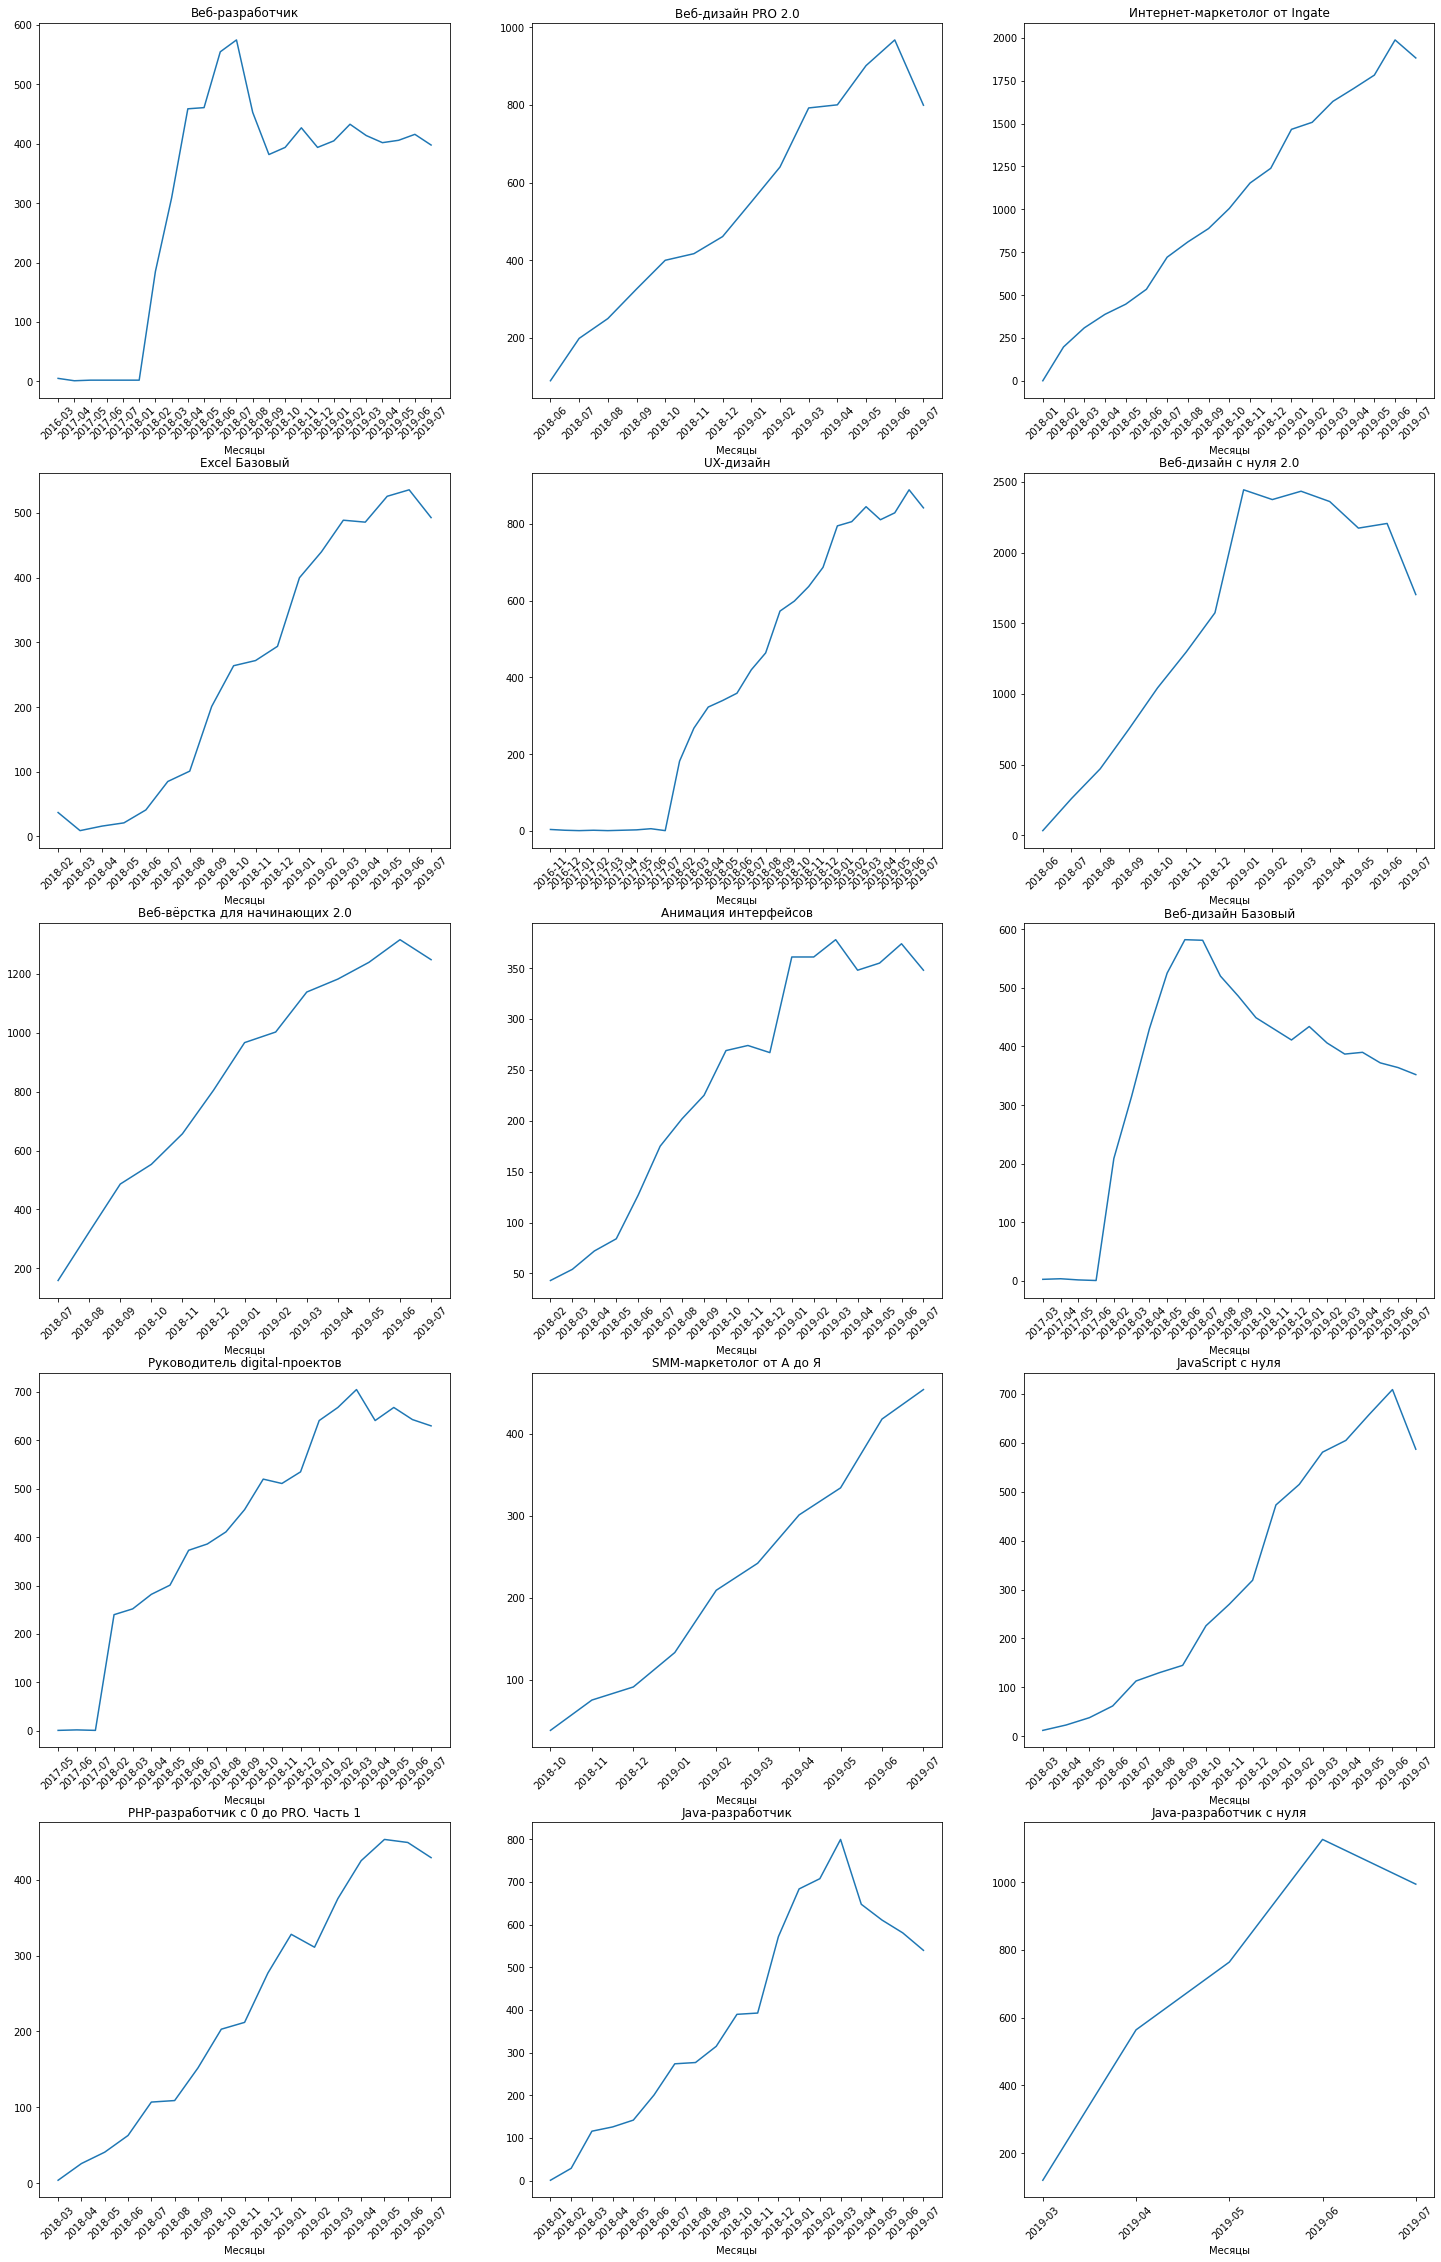

In [ ]:
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize = (25, 40)) #такой большой figure чтобы надписи на графиках не перекрывали друг друга
titles = df_homework.groupby('title').min()['date'].sort_values().index.to_list()
print(titles)
for n, title in enumerate(titles):
  data = df_homework_by_plot[df_homework_by_plot['title'] == title][['count', 'date']]
  print(title)
  ax = axs[(round(n%5))][(round(n%3))]
  ax.plot(data['date'], data['count'])

  ax.set_title(f'{title}')
  ax.set_xlabel('Месяцы')
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)


## 6. Построим один line-graph для всех курсов.

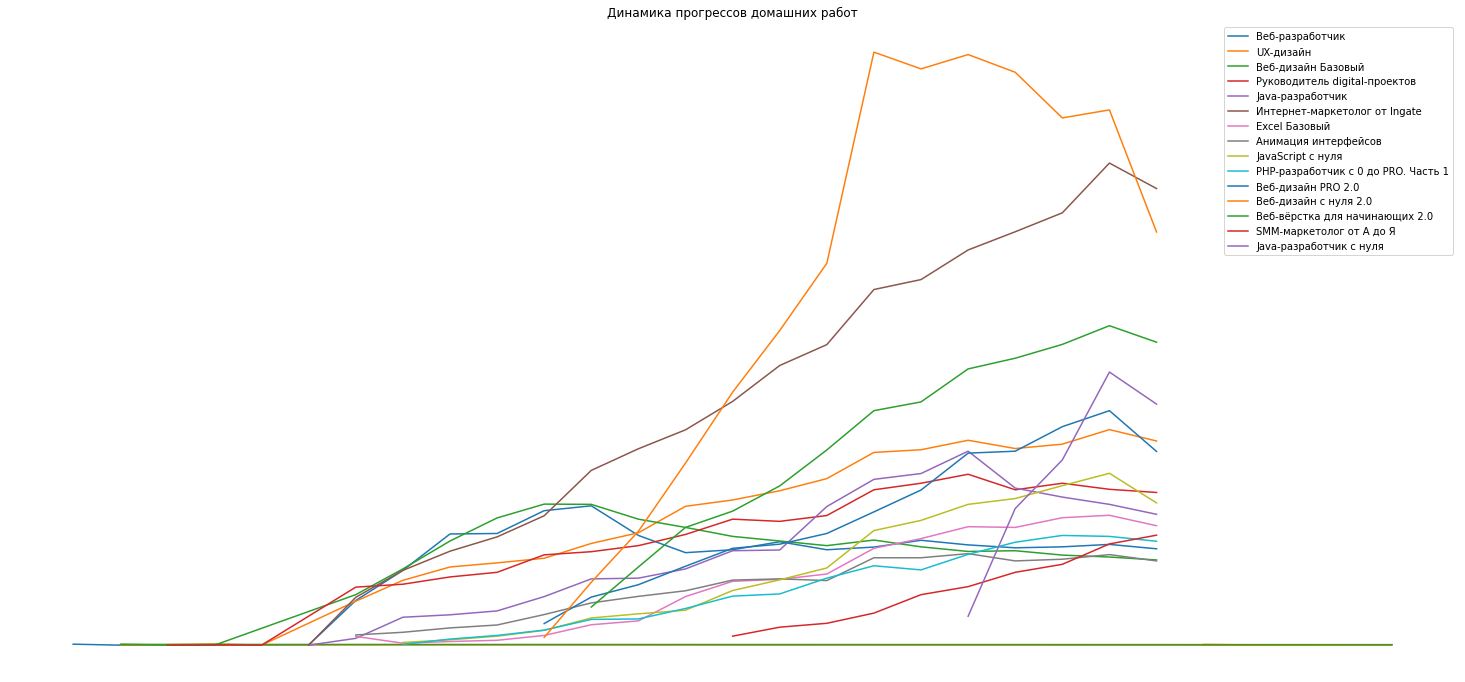

In [ ]:
fig, ax = plt.subplots(figsize = (26, 12), sharex = True)
titles = df_homework.groupby('title').min()['date'].sort_values().index.to_list()

for title in (titles):
  data = df_homework_by_plot[df_homework_by_plot['title'] == title]
  ax.plot(data['date'], data['count'], label = title)
ax.set_title('Динамика прогрессов домашних работ')
ax.axis('off')
ax.legend()

## 7. На основании рассчитанных значений сделаем аналитический вывод.

Проанализировав графики прироста студентов, мы можем заметить, что с момента запуска курса и дальше, прирост, как правило, только увеличивается. Первые 2-4 месяца после запуска прирост не показывает внушительного роста, но потом, на протяжении 1-6 месяцев демонстрирует взрывное увеличение в разы, десятки раз.
Корреляции между приростом студентов и сферой курса не наблюдается. На всех курсах обнаруживается интересная тенденция. Под конец исследуемого периода прирост существенно снижается. Причины этого выявить довольно трудно: исчерпание платежеспособных клиентов, активные действия конкурентов, завершение рекламной кампании и т.д. Однако имея на руках данную статистику, можно сделать вывод, что по прошествии двух лет прирост стабилизируется.
На общем графике видно, что пики прироста совпадают точь-в-точь у совершенно разных курсов. Это можно связать с удачной рекламной кампанией и предположить, что интерес клиентов направлен скорее на всю платформу: если она вызывает доверие, то пользователь купит подходящий ему курс.

Нагрузка на преподавателей, как и следовало ожидать, растёт линейно на протяжении почти всего исследуемого периода, и начинает стабилизироваться только в его последние месяцы. Можно говорить о том, что в течение первых полутора лет траектория роста похожа на прямую, идущую под углом в 45 градусов, количество преподавателей нужно увеличивать соответственно.
Однако снижение числа активных домашних заданий является верным признаком того, что нагрузка стабилизировалась и нужды в увеличении количества преподавателей больше нет. Верность этого вывода подкрепляется также графиками снижения прироста новых студентов, что ограничивает дальнейший потенциал увеличения домашних заданий, одновременно находящихся на проверке.

# 3. Выявление проблемных модулей


## 1. Рассчитаем минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса.

Сформируем отдельный датафрейм оставив только домашние задания.

In [ ]:
df3 = df[df['is_homework'] == True]

In [ ]:
df3

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework,start_month_year
3555,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2018-06
3556,3b9dce04f32da32763124602557f92a3,1,6,done,2019-03-16 15:28:29.978311+00,2019-03-18 09:51:16.562395+00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2019-03
3557,73e17a05355852fe65b785c82c37d1ad,1,6,done,2019-07-02 19:01:15.282595+00,2019-07-03 18:10:52.187797+00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2019-07
3558,cc3eb34ae49c719648352c4175daee88,1,6,done,2018-07-25 09:39:56.674653+00,2018-07-27 15:39:17.61395+00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2018-07
3559,04ace4fe130d90c801e24eea13ee808e,1,6,done,2019-04-24 18:11:57.82383+00,2019-04-25 10:11:25.756062+00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2019-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350669,132afd9b9dbe68dabbfa4d2c3d1ddb3a,9,14,start,2019-07-15 00:35:45.64027+00,NaN,03802954ea7d0a7de28272a8b3986ebe,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07
350670,f6216204f2c65eea37f913cfa5e4eb6a,9,14,done,2019-07-01 20:06:56.697121+00,2019-07-06 04:47:43.213367+00,c21fa1f7fa61d11253e4cc8eeeb03027,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07
350671,45289b36f4827d49d9d3757fc9486ca0,9,14,done,2019-07-01 14:35:47.629736+00,2019-07-12 03:36:51.775851+00,4e5f1ba884ba5759c07cf6e942ae5e98,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07
350672,7c46c781a54bf9d17f24b4920df4f7eb,9,14,start,2019-07-03 18:46:02.766878+00,NaN,1a0acf593d0a38155bafdf29e3cba338,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07


In [ ]:
del df3['progress_id']
del df3['course_id']
del df3['field']
del df3['module_title']
del df3['lesson_title']
del df3['lesson_token']
del df3['is_video']
del df3['start_month_year']
del df3['is_homework']

In [ ]:
df3

,module_number,lesson_number,status,start_date,finish_date,student_id,title
3555,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0
3556,1,6,done,2019-03-16 15:28:29.978311+00,2019-03-18 09:51:16.562395+00,03151bc73bdb29fe1be1443c6d83e22f,Веб-дизайн PRO 2.0
3557,1,6,done,2019-07-02 19:01:15.282595+00,2019-07-03 18:10:52.187797+00,ed235f47e16da6e83d3f1cb511f38ea6,Веб-дизайн PRO 2.0
3558,1,6,done,2018-07-25 09:39:56.674653+00,2018-07-27 15:39:17.61395+00,59e8681cb7b5c8043ae1aac10c8053ca,Веб-дизайн PRO 2.0
3559,1,6,done,2019-04-24 18:11:57.82383+00,2019-04-25 10:11:25.756062+00,c16250079190337fe9074736e33eecb2,Веб-дизайн PRO 2.0
...,...,...,...,...,...,...,...
350669,9,14,start,2019-07-15 00:35:45.64027+00,NaN,03802954ea7d0a7de28272a8b3986ebe,Java-разработчик c нуля
350670,9,14,done,2019-07-01 20:06:56.697121+00,2019-07-06 04:47:43.213367+00,c21fa1f7fa61d11253e4cc8eeeb03027,Java-разработчик c нуля
350671,9,14,done,2019-07-01 14:35:47.629736+00,2019-07-12 03:36:51.775851+00,4e5f1ba884ba5759c07cf6e942ae5e98,Java-разработчик c нуля
350672,9,14,start,2019-07-03 18:46:02.766878+00,NaN,1a0acf593d0a38155bafdf29e3cba338,Java-разработчик c нуля


Переведём даты в удобный формат.

In [ ]:
df3['start_date'] = pd.to_datetime(df3['start_date'])
df3['finish_date'] = pd.to_datetime(df3['finish_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Сгруппируем по курсам, модулям и, наконец, отдельным студентам, после чего у всех дат начала каждого студента - возьмём минимальную, а у дат завершения - максимальную. Таким образом время выполнения модуля будет от начала выполнения первого дз до завершения последнего.

In [ ]:
df3 = df3.groupby(['title', 'module_number', 'student_id']).agg({'start_date': lambda x: min(x), 'finish_date': lambda x: max(x)})
df3

start_date                      finish_date
title                         module_number student_id                                                                                        
Excel Базовый                 1             001b192f899a84496be98b41906246fc 2019-03-29 20:43:08.914029+00:00 2019-03-31 07:19:02.064532+00:00
                                            006f0189ec657741ee4d53474c7a258d 2019-01-25 03:25:26.690241+00:00 2019-01-26 09:52:36.422160+00:00
                                            0074621b6955733338ab0feb2a9a2100 2019-04-10 14:09:35.364174+00:00 2019-04-13 05:57:59.476184+00:00
                                            0098ca12f73a56dadbf6099389305d80 2019-04-03 11:06:03.164368+00:00 2019-04-05 09:37:10.695661+00:00
                                            0203a4ab8610441e866932fb899ed583 2019-05-08 16:24:20.710680+00:00                              NaT
...                                                                                                       ...                              ...
Руководитель digital-проектов 16            e3794e7c0fcef6e0682a6914497f4bf7 2018-11-14 10:45:17.961606+00:00 2018-11-19 08:26:38.864594+00:00
                                            e3cf05b76236f033304bb99fe2bb7bbd 2018-09-12 11:13:36.657431+00:00 2018-10-03 10:15:09.438404+00:00
                                            e52d093cb79135e38e420734654ed571 2019-02-21 08:36:48.211670+00:00 2019-03-06 05:47:49.975772+00:00
                                            e77ebf1f6c9bb45bcc6b0ad5b9c4cba8 2019-02-18 14:50:33.038021+00:00 2019-02-25 07:54:46.183416+00:00
                                            e947f7450ad2364a6f5c78836a431f2b 2019-04-07 10:50:18.373366+00:00 2019-04-09 02:14:10.518995+00:00

[52777 rows x 2 columns]

Выбросим пустые строки.

In [ ]:
df3 = df3.dropna()

Посчитаем время работы, сразу переводя его в дни.

In [ ]:
df3['time_work'] = (df3['finish_date'] - df3['start_date']).dt.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3

start_date  ... time_work
title                         module_number student_id                                                         ...          
Excel Базовый                 1             001b192f899a84496be98b41906246fc 2019-03-29 20:43:08.914029+00:00  ...         1
                                            006f0189ec657741ee4d53474c7a258d 2019-01-25 03:25:26.690241+00:00  ...         1
                                            0074621b6955733338ab0feb2a9a2100 2019-04-10 14:09:35.364174+00:00  ...         2
                                            0098ca12f73a56dadbf6099389305d80 2019-04-03 11:06:03.164368+00:00  ...         1
                                            0284a9c2ee0d9c7a97e2a943b0d52b92 2018-07-07 12:42:17.184315+00:00  ...         1
...                                                                                                       ...  ...       ...
Руководитель digital-проектов 16            e3794e7c0fcef6e0682a6914497f4bf7 2018-11-14 10:45:17.961606+00:00  ...         4
                                            e3cf05b76236f033304bb99fe2bb7bbd 2018-09-12 11:13:36.657431+00:00  ...        20
                                            e52d093cb79135e38e420734654ed571 2019-02-21 08:36:48.211670+00:00  ...        12
                                            e77ebf1f6c9bb45bcc6b0ad5b9c4cba8 2019-02-18 14:50:33.038021+00:00  ...         6
                                            e947f7450ad2364a6f5c78836a431f2b 2019-04-07 10:50:18.373366+00:00  ...         1

[43386 rows x 3 columns]

Не можем быть отрицательного времени работы - это явно ошибка записи, поэтому оставим только неотрицательные.

In [ ]:
df3 = df3[df3['time_work'] >= 0]
df3

start_date  ... time_work
title                         module_number student_id                                                         ...          
Excel Базовый                 1             001b192f899a84496be98b41906246fc 2019-03-29 20:43:08.914029+00:00  ...         1
                                            006f0189ec657741ee4d53474c7a258d 2019-01-25 03:25:26.690241+00:00  ...         1
                                            0074621b6955733338ab0feb2a9a2100 2019-04-10 14:09:35.364174+00:00  ...         2
                                            0098ca12f73a56dadbf6099389305d80 2019-04-03 11:06:03.164368+00:00  ...         1
                                            0284a9c2ee0d9c7a97e2a943b0d52b92 2018-07-07 12:42:17.184315+00:00  ...         1
...                                                                                                       ...  ...       ...
Руководитель digital-проектов 16            e3794e7c0fcef6e0682a6914497f4bf7 2018-11-14 10:45:17.961606+00:00  ...         4
                                            e3cf05b76236f033304bb99fe2bb7bbd 2018-09-12 11:13:36.657431+00:00  ...        20
                                            e52d093cb79135e38e420734654ed571 2019-02-21 08:36:48.211670+00:00  ...        12
                                            e77ebf1f6c9bb45bcc6b0ad5b9c4cba8 2019-02-18 14:50:33.038021+00:00  ...         6
                                            e947f7450ad2364a6f5c78836a431f2b 2019-04-07 10:50:18.373366+00:00  ...         1

[42549 rows x 3 columns]

Группируем по курсам и модулям и находим собственно минимальное, максимальное, среднее и медианное время выполнения каждого модуля.

In [ ]:
df3.groupby(['title', 'module_number']).agg(['min', 'max', 'mean', 'median'])


time_work                       
                                                  min  max       mean median
title                         module_number                                 
Excel Базовый                 1                     0  183   5.515419    2.0
                              2                     0  184   3.805970    1.0
                              3                     0   89   2.890339    1.0
                              4                     0  327  10.515050    3.0
                              5                     0  175   6.921053    3.0
...                                               ...  ...        ...    ...
Руководитель digital-проектов 12                    0  211  22.518519    7.0
                              13                    0  246  28.403226   13.0
                              14                    0  199  15.807018    8.0
                              15                    0  132   6.842105    2.0
                              16                    0  355  20.039216    7.0

[190 rows x 4 columns]

## 2. Построим line-graph с медианным временем прохождения каждого модуля для каждого курса.

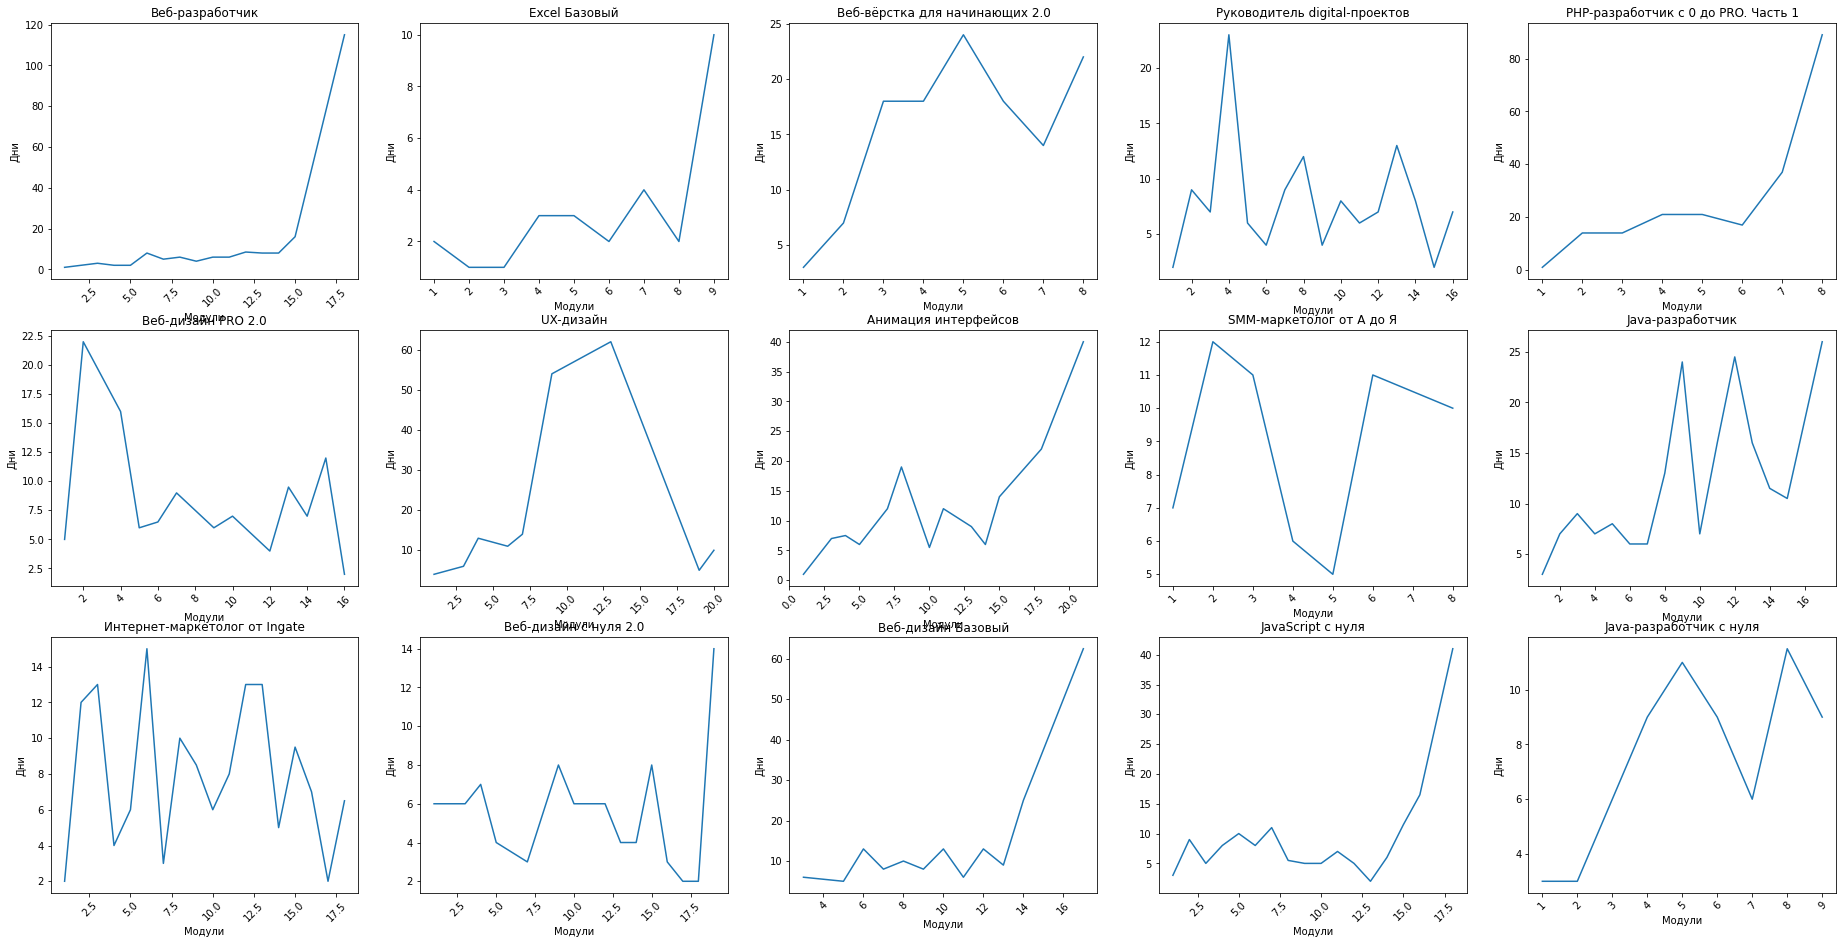

In [ ]:
fig, axs = plt.subplots(ncols = 5, nrows = 3, figsize=(32, 16))
for n, title in enumerate(titles): # "titles" это список состоящий из названия курсов который мы уже использовали ранее для построения похожего line-graph
  data = df3.groupby(['title', 'module_number']).agg(['min', 'max', 'mean', 'median']).reset_index()[df3.groupby(['title', 'module_number']).agg(['min', 'max', 'mean', 'median']).reset_index()['title'] == title]
  ax = axs[(round(n%3))][(round(n%5))]
  ax.plot(data['module_number'], data['time_work']['median'])

  ax.set_title(f'{title}')
  ax.set_xlabel('Модули')
  ax.set_ylabel('Дни')
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)

## 3. Чтобы выявить сезонность, посчитаем медианное время выполнения домашней работы по месяцам для каждого курса.

Тут мы сталкиваемся с трудностью, из-за того что многие домашние работы растягиваются более чем на один месяц их невозможно чётко разделить по месяцам. Учитывая смысл задания и ориентируясь на практическую ценность, будем застчитывать работы тому месяцу - в который они были закончены, потому что закончить это самое главное.

In [ ]:
df3

start_date  ... time_work
title                         module_number student_id                                                         ...          
Excel Базовый                 1             001b192f899a84496be98b41906246fc 2019-03-29 20:43:08.914029+00:00  ...         1
                                            006f0189ec657741ee4d53474c7a258d 2019-01-25 03:25:26.690241+00:00  ...         1
                                            0074621b6955733338ab0feb2a9a2100 2019-04-10 14:09:35.364174+00:00  ...         2
                                            0098ca12f73a56dadbf6099389305d80 2019-04-03 11:06:03.164368+00:00  ...         1
                                            0284a9c2ee0d9c7a97e2a943b0d52b92 2018-07-07 12:42:17.184315+00:00  ...         1
...                                                                                                       ...  ...       ...
Руководитель digital-проектов 16            e3794e7c0fcef6e0682a6914497f4bf7 2018-11-14 10:45:17.961606+00:00  ...         4
                                            e3cf05b76236f033304bb99fe2bb7bbd 2018-09-12 11:13:36.657431+00:00  ...        20
                                            e52d093cb79135e38e420734654ed571 2019-02-21 08:36:48.211670+00:00  ...        12
                                            e77ebf1f6c9bb45bcc6b0ad5b9c4cba8 2019-02-18 14:50:33.038021+00:00  ...         6
                                            e947f7450ad2364a6f5c78836a431f2b 2019-04-07 10:50:18.373366+00:00  ...         1

[42549 rows x 3 columns]

Уточним, что finish_date имеет нужный формат.

In [ ]:
df3['finish_date'] = pd.to_datetime(df3['finish_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Удалим start_date потому что эта информация нам уже не нужна.

In [ ]:
del df3['start_date']

Теперь, нам нужно получить только год и месяц у finish_date

In [ ]:
df3['months'] = df3['finish_date'].apply(lambda x: x.month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3.groupby(['title', 'months']).median().reset_index()['time_work']

0       2.0
1       2.0
2       2.0
3       1.0
4       2.0
       ... 
166    14.0
167    13.0
168     6.5
169     5.0
170     7.0
Name: time_work, Length: 171, dtype: float64

## 4. Построим line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам.

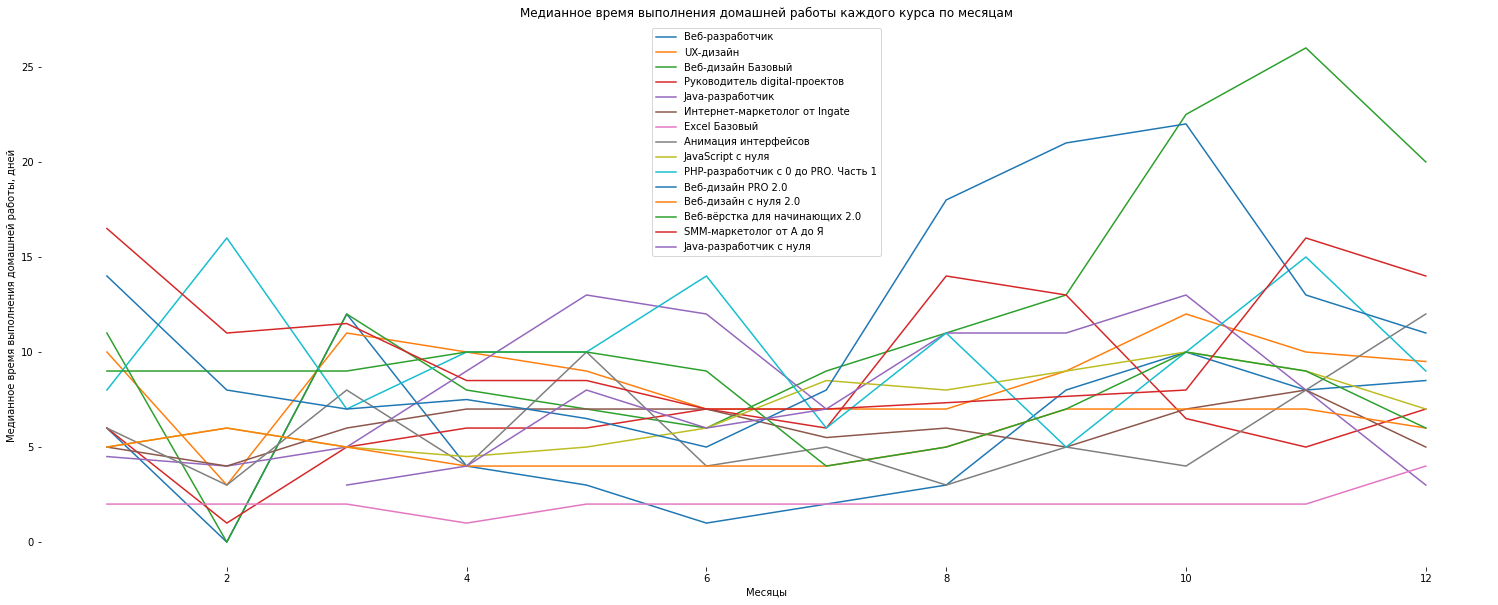

In [ ]:
fig, ax = plt.subplots(figsize = (26, 10))
# titles как список названий курсов остался у нас с прошлых графиков

for title in titles:
  data = df3.groupby(['title', 'months']).median().reset_index()[df3.groupby(['title', 'months']).median().reset_index()['title'] == title][['months', 'time_work']]
  ax.plot(data['months'], data['time_work'], label = title)
ax.legend()
ax.set_title('Медианное время выполнения домашней работы каждого курса по месяцам')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Медианное время выполнения домашней работы, дней')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)



## 5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики).

Важно отметить, что разное время выполнения домашнего задания это нормально. Проблемными следует считать модули, которые резко выделяются на фоне остальных. Кроме того, выполнение домашней работы свыше 40-ти дней может свидетельствовать о снижении мотивации студента, либо о излишней сложности задания.
В тоже время, учитывая, что в некоторых модулях содержится несколько дз, мы можем говорить о том, что выполнения дз 20, иногда 40 дней вполне допустимо.
Обратим внимание на курсы: "Веб-разработчик", "PHP-разработчик с нуля до PRO часть 1", "Веб-дизайн базовый". Складывается ощущение что люди массово снижают темпы обучение под самый конец этих курсов, поскольку медианное время выполнения работы в 120 или даже 80 дней - это очень много, т.к. данные не искажены выбросами - временем студентов, которые бросили курсы.
Другим объяснением может служить очень объёмная выпускная работа. Из представленных данных трудно понять какая гипотеза верна, но однозначно следует обратить внимание на последние модули этих курсов, т.к. они выглядят проблемными.
Отдельно можно отметить 4-ый модуль курса "Руководитель digital-проектов", 2-ой модуль курса "Веб-дизайн PRO 2.0", 8-ой и 13-ый модули курса "UX-дизайн". Эти модули являются проблемными, т.к. чаще всего требуют на выполнение значительно большего времени, чем остальные модули данных курсов.
Модули в остальных курсах, если и выделяются большим временем прохождения, как правило не отнимают у студентов более 40-ка дней, что выглядит приемлемо для выполнения нескольких домашних заданий или работы над сложным проектом, особенно учитывая, что студенты, чаще всего, уже имеют основную работу.
Изучив сезонность выполнения домашних работ, можем заметить, что она выражена довольно слабо почти на всех курсах, кроме "Веб-дизайн базовый", "Руководитель digital-проектов", "JavaScript с нуля", "Веб-дизайн PRO 2.0", "SMM-маркетолог от А до Я".
Интересно, что скорость изучения курсов немного увеличивается в Январе, возможно это связано с традиционной практикой начинать новую жизнь с нового года, что даёт большую мотивацию на некоторое время, или просто курсы skillbox часто выступают в роли новогоднего подарка.

# 4. Расчет конверсии



## 1. Посчитаем конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле, к количеству студентов, сдавших задание в предыдущем модуле.

Создадим датафрейм с теми колонками и строками, которые нужны нам для этого задания.

In [ ]:
df4 = df[df['is_homework'] == True]
del df4['progress_id']
del df4['course_id']
del df4['lesson_title']
del df4['lesson_token']
del df4['is_video']
del df4['is_homework']
del df4['start_month_year']

df4['start_date'] = pd.to_datetime(df4['start_date'])
df4['finish_date'] = pd.to_datetime(df4['finish_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Посчитаем сначала количество начатых домашних работ на каждом модуле, это работы со всеми статусами кроме "wait", сгруппируем их по курсам, модулям и конкретным студентам и у каждого студента возьмём прогресс с самым маленьким номером урока (таким образом выберем самое первое дз).
Затем посчитаем количество студентов для каждого курса и модуля, это будет количество тех, кто приступал к домашнему заданию в этом модуле.

In [ ]:
df4_start = df4.groupby(['title', 'field', 'module_number', 'module_title', 'student_id']).agg({'lesson_number': lambda x: min(x)})

In [ ]:
df4_start = df4_start.groupby(['title', 'field', 'module_number', 'module_title']).count()
df4_start

lesson_number
title                         field    module_number module_title                                                     
Excel Базовый                 Business 1             Основной функционал Excel                                     518
                                       2             Основной функционал Excel (продолжение)                       434
                                       3             Формулы и функции Excel. Введение                             398
                                       4             Формулы и функции Excel. Продолжаем работать с ...            345
                                       5             Формулы и функции Excel. Более сложные формулы                298
...                                                                                                                ...
Руководитель digital-проектов Business 12            Решение факапов. Lean/TOC. Обзор.                              95
                                       13            Интеграционные проекты.                                        87
                                       14            Управление дизайнерами. Разработка дизайна по s...             71
                                       15            Основы технической грамотности                                 66
                                       16            Контроль. Риски. Поощрения. Наказания. Обратная...             64

[191 rows x 1 columns]

Теперь аналогичным образом посчитаем количество тех, кто закончил последнее домашнее задание в модуле, для этого используем статус "done" и значение самого последнего урока.

In [ ]:
df4_end = df4[(df4['status'] == 'done')].groupby(['title', 'field', 'module_number', 'module_title', 'student_id']).agg({'lesson_number': lambda x: max(x)})

In [ ]:
df4_end = df4_end.groupby(['title', 'field', 'module_number', 'module_title']).count()
df4_end

lesson_number
title                         field    module_number module_title                                                     
Excel Базовый                 Business 1             Основной функционал Excel                                     458
                                       2             Основной функционал Excel (продолжение)                       406
                                       3             Формулы и функции Excel. Введение                             387
                                       4             Формулы и функции Excel. Продолжаем работать с ...            303
                                       5             Формулы и функции Excel. Более сложные формулы                270
...                                                                                                                ...
Руководитель digital-проектов Business 12            Решение факапов. Lean/TOC. Обзор.                              88
                                       13            Интеграционные проекты.                                        69
                                       14            Управление дизайнерами. Разработка дизайна по s...             64
                                       15            Основы технической грамотности                                 64
                                       16            Контроль. Риски. Поощрения. Наказания. Обратная...             58

[190 rows x 1 columns]

Теперь объединим данных о начатых и законченных домашних заданиях вместе...

In [ ]:
df4 = df4_start.merge(df4_end, on=['title', 'field', 'module_number', 'module_title'])

In [ ]:
df4

lesson_number_x  lesson_number_y
title                         field    module_number module_title                                                                        
Excel Базовый                 Business 1             Основной функционал Excel                                       518              458
                                       2             Основной функционал Excel (продолжение)                         434              406
                                       3             Формулы и функции Excel. Введение                               398              387
                                       4             Формулы и функции Excel. Продолжаем работать с ...              345              303
                                       5             Формулы и функции Excel. Более сложные формулы                  298              270
...                                                                                                                  ...              ...
Руководитель digital-проектов Business 12            Решение факапов. Lean/TOC. Обзор.                                95               88
                                       13            Интеграционные проекты.                                          87               69
                                       14            Управление дизайнерами. Разработка дизайна по s...               71               64
                                       15            Основы технической грамотности                                   66               64
                                       16            Контроль. Риски. Поощрения. Наказания. Обратная...               64               58

[190 rows x 2 columns]

In [ ]:
df4.columns = ['Приступило', 'Завершило']

In [ ]:
df4

Приступило  Завершило
title                         field    module_number module_title                                                             
Excel Базовый                 Business 1             Основной функционал Excel                                  518        458
                                       2             Основной функционал Excel (продолжение)                    434        406
                                       3             Формулы и функции Excel. Введение                          398        387
                                       4             Формулы и функции Excel. Продолжаем работать с ...         345        303
                                       5             Формулы и функции Excel. Более сложные формулы             298        270
...                                                                                                             ...        ...
Руководитель digital-проектов Business 12            Решение факапов. Lean/TOC. Обзор.                           95         88
                                       13            Интеграционные проекты.                                     87         69
                                       14            Управление дизайнерами. Разработка дизайна по s...          71         64
                                       15            Основы технической грамотности                              66         64
                                       16            Контроль. Риски. Поощрения. Наказания. Обратная...          64         58

[190 rows x 2 columns]

Так как нам нужно поделить количество приступивших к каждому модулю на количество завершивших предыдущий, то стоблец с завершившими нужно сдвинуть на одну ячейку вниз и просто поделить полученные результаты друг на друга.

In [ ]:
df4['Завершило предыдущий'] = df4['Завершило'].shift(1)

In [ ]:
df4['conversion'] = df4['Приступило']/df4['Завершило предыдущий']
df4

Приступило  ...  conversion
title                         field    module_number module_title                                                    ...            
Excel Базовый                 Business 1             Основной функционал Excel                                  518  ...         NaN
                                       2             Основной функционал Excel (продолжение)                    434  ...    0.947598
                                       3             Формулы и функции Excel. Введение                          398  ...    0.980296
                                       4             Формулы и функции Excel. Продолжаем работать с ...         345  ...    0.891473
                                       5             Формулы и функции Excel. Более сложные формулы             298  ...    0.983498
...                                                                                                             ...  ...         ...
Руководитель digital-проектов Business 12            Решение факапов. Lean/TOC. Обзор.                           95  ...    0.969388
                                       13            Интеграционные проекты.                                     87  ...    0.988636
                                       14            Управление дизайнерами. Разработка дизайна по s...          71  ...    1.028986
                                       15            Основы технической грамотности                              66  ...    1.031250
                                       16            Контроль. Риски. Поощрения. Наказания. Обратная...          64  ...    1.000000

[190 rows x 4 columns]

Теперь удалим первые модули, так как они не учитываются в конверсии, подсчитанной таким спрособом и из-за сдвинутых строк будут содержать некорректные данные, когда количество начавших новое дз второго модуля будет делиться на количество здавших последний модуль предыдущего курса.

In [ ]:
df4 = df4.reset_index()

In [ ]:
df4 = df4[df4['module_number'] != 1]

In [ ]:
df4[df4['title'] == 'Excel Базовый']

,title,field,module_number,module_title,Приступило,Завершило,Завершило предыдущий,conversion
1,Excel Базовый,Business,2,Основной функционал Excel (продолжение),434,406,458.0,0.947598
2,Excel Базовый,Business,3,Формулы и функции Excel. Введение,398,387,406.0,0.980296
3,Excel Базовый,Business,4,Формулы и функции Excel. Продолжаем работать с...,345,303,387.0,0.891473
4,Excel Базовый,Business,5,Формулы и функции Excel. Более сложные формулы,298,270,303.0,0.983498
5,Excel Базовый,Business,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,242,270.0,0.974074
6,Excel Базовый,Business,7,Визуализация данных Excel,238,200,242.0,0.983471
7,Excel Базовый,Business,8,Сводные таблицы Excel,202,186,200.0,1.010000
8,Excel Базовый,Business,9,Экзаменационная работа,191,91,186.0,1.026882


## 2. Построим bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.

Не очень понятно, как на одном графике построить конверсию из одного модуля в другой на каждом курсе. Попробуем построить, используя среднее значение конверсии, думаю оно будет информативнее чем медиана или мода. Сначала посчитаем его.


In [ ]:
df4[['title', 'conversion']].groupby('title').mean()

,conversion
title,
Excel Базовый,0.974661
Java-разработчик,0.997445
Java-разработчик c нуля,0.816986
JavaScript с нуля,1.013623
PHP-разработчик с 0 до PRO. Часть 1,1.079474
SMM-маркетолог от А до Я,1.595499
UX-дизайн,1.020498
Анимация интерфейсов,0.997562
Веб-вёрстка для начинающих 2.0,1.025724


Видим, что у курсов JavaScript с нуля, PHP-разработчик с 0 до PRO. Часть 1, SMM-маркетолог от А до Я, UX-дизайн, Веб-верстка для начинающих, Веб-дизайн Базовый, Веб-разработчик и руководитель digital-проектов средняя конверсия превышает единицу. Это естественное значение, так как некоторые модули оказываются интереснее для студентов чем остальные, и многие люди приступают к ним минуя предыдущие.

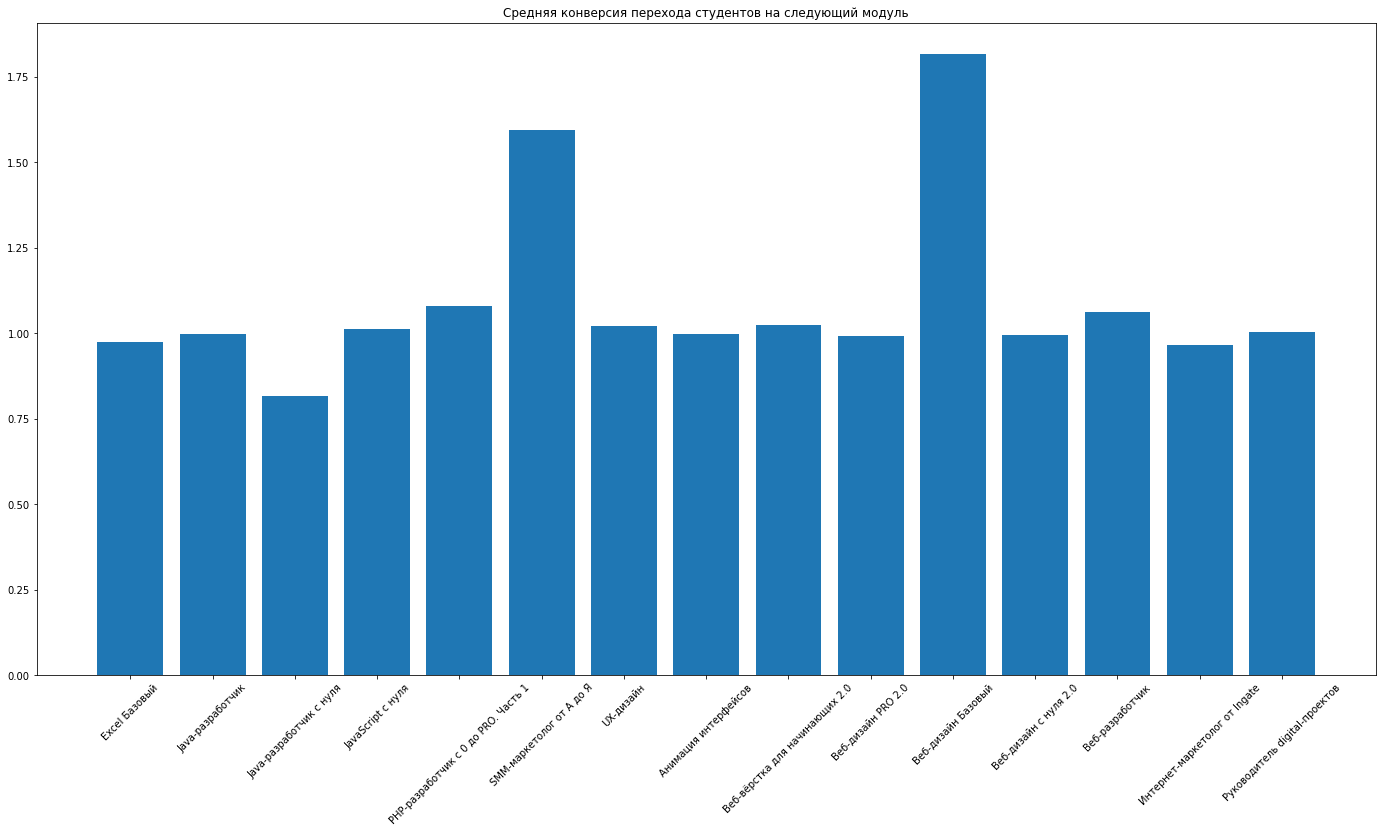

In [ ]:
fig, ax = plt.subplots(figsize = (24, 12))
data = df4.groupby('title')['conversion'].mean()
ax.bar(data.index, data)
ax.set_title('Средняя конверсия перехода студентов на следующий модуль')
ax.tick_params(axis = 'x', rotation = 45)

## 3. Построим bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе, для каждого курса сделаем отдельный график.

Теперь объединим стоблцы module_number и module_title для того, чтобы легко вместе нанести их на оси графика.

In [ ]:
df4 = df4.reset_index()
df4

,index,title,field,module_number,module_title,Приступило,Завершило,Завершило предыдущий,conversion
0,1,Excel Базовый,Business,2,Основной функционал Excel (продолжение),434,406,458.0,0.947598
1,2,Excel Базовый,Business,3,Формулы и функции Excel. Введение,398,387,406.0,0.980296
2,3,Excel Базовый,Business,4,Формулы и функции Excel. Продолжаем работать с...,345,303,387.0,0.891473
3,4,Excel Базовый,Business,5,Формулы и функции Excel. Более сложные формулы,298,270,303.0,0.983498
4,5,Excel Базовый,Business,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,242,270.0,0.974074
...,...,...,...,...,...,...,...,...,...
171,185,Руководитель digital-проектов,Business,12,Решение факапов. Lean/TOC. Обзор.,95,88,98.0,0.969388
172,186,Руководитель digital-проектов,Business,13,Интеграционные проекты.,87,69,88.0,0.988636
173,187,Руководитель digital-проектов,Business,14,Управление дизайнерами. Разработка дизайна по ...,71,64,69.0,1.028986
174,188,Руководитель digital-проектов,Business,15,Основы технической грамотности,66,64,64.0,1.031250


In [ ]:
df4['module'] = df4['module_number'].astype(str) + ',' +  df4['module_title'].astype(str)

In [ ]:
df4

,index,title,field,module_number,module_title,Приступило,Завершило,Завершило предыдущий,conversion,module
0,1,Excel Базовый,Business,2,Основной функционал Excel (продолжение),434,406,458.0,0.947598,"2,Основной функционал Excel (продолжение)"
1,2,Excel Базовый,Business,3,Формулы и функции Excel. Введение,398,387,406.0,0.980296,"3,Формулы и функции Excel. Введение"
2,3,Excel Базовый,Business,4,Формулы и функции Excel. Продолжаем работать с...,345,303,387.0,0.891473,"4,Формулы и функции Excel. Продолжаем работать..."
3,4,Excel Базовый,Business,5,Формулы и функции Excel. Более сложные формулы,298,270,303.0,0.983498,"5,Формулы и функции Excel. Более сложные формулы"
4,5,Excel Базовый,Business,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,242,270.0,0.974074,"6,Формулы и функции Excel. Работа с ошибками, ..."
...,...,...,...,...,...,...,...,...,...,...
171,185,Руководитель digital-проектов,Business,12,Решение факапов. Lean/TOC. Обзор.,95,88,98.0,0.969388,"12,Решение факапов. Lean/TOC. Обзор."
172,186,Руководитель digital-проектов,Business,13,Интеграционные проекты.,87,69,88.0,0.988636,"13,Интеграционные проекты."
173,187,Руководитель digital-проектов,Business,14,Управление дизайнерами. Разработка дизайна по ...,71,64,69.0,1.028986,"14,Управление дизайнерами. Разработка дизайна ..."
174,188,Руководитель digital-проектов,Business,15,Основы технической грамотности,66,64,64.0,1.031250,"15,Основы технической грамотности"


In [ ]:
df4['field'].unique()

array(['Business', 'Development', 'Marketing', 'Design'], dtype=object)

In [ ]:
def color(x):
  if x == 'Business':
    return "red"
  elif x == 'Development':
    return 'blue'
  elif x == 'Marketing':
    return 'green'
  else:
    return 'purple'

In [ ]:
df4['color'] = df4['field'].apply(color)

В процессе простроения графика выяснилось, что некоторые названия модулей слишком большие и нарушают красоту графиков, поэтому придется их обрезать.

In [ ]:
g = []
for i in df4['module']:
  g.append(len(i))
g.sort()
print(g)



[6, 8, 8, 8, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 12, 13, 14, 14, 14, 14, 15, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 43, 44, 44, 45, 45, 45, 45, 45, 45, 45, 46, 48, 48, 48, 49, 49, 50, 50, 51, 52, 54, 55, 55, 56, 57, 57, 57, 58, 61, 66, 66, 66, 68, 70, 83, 85, 100, 118]


In [ ]:
df4['module'] = df4['module'].str[:40]

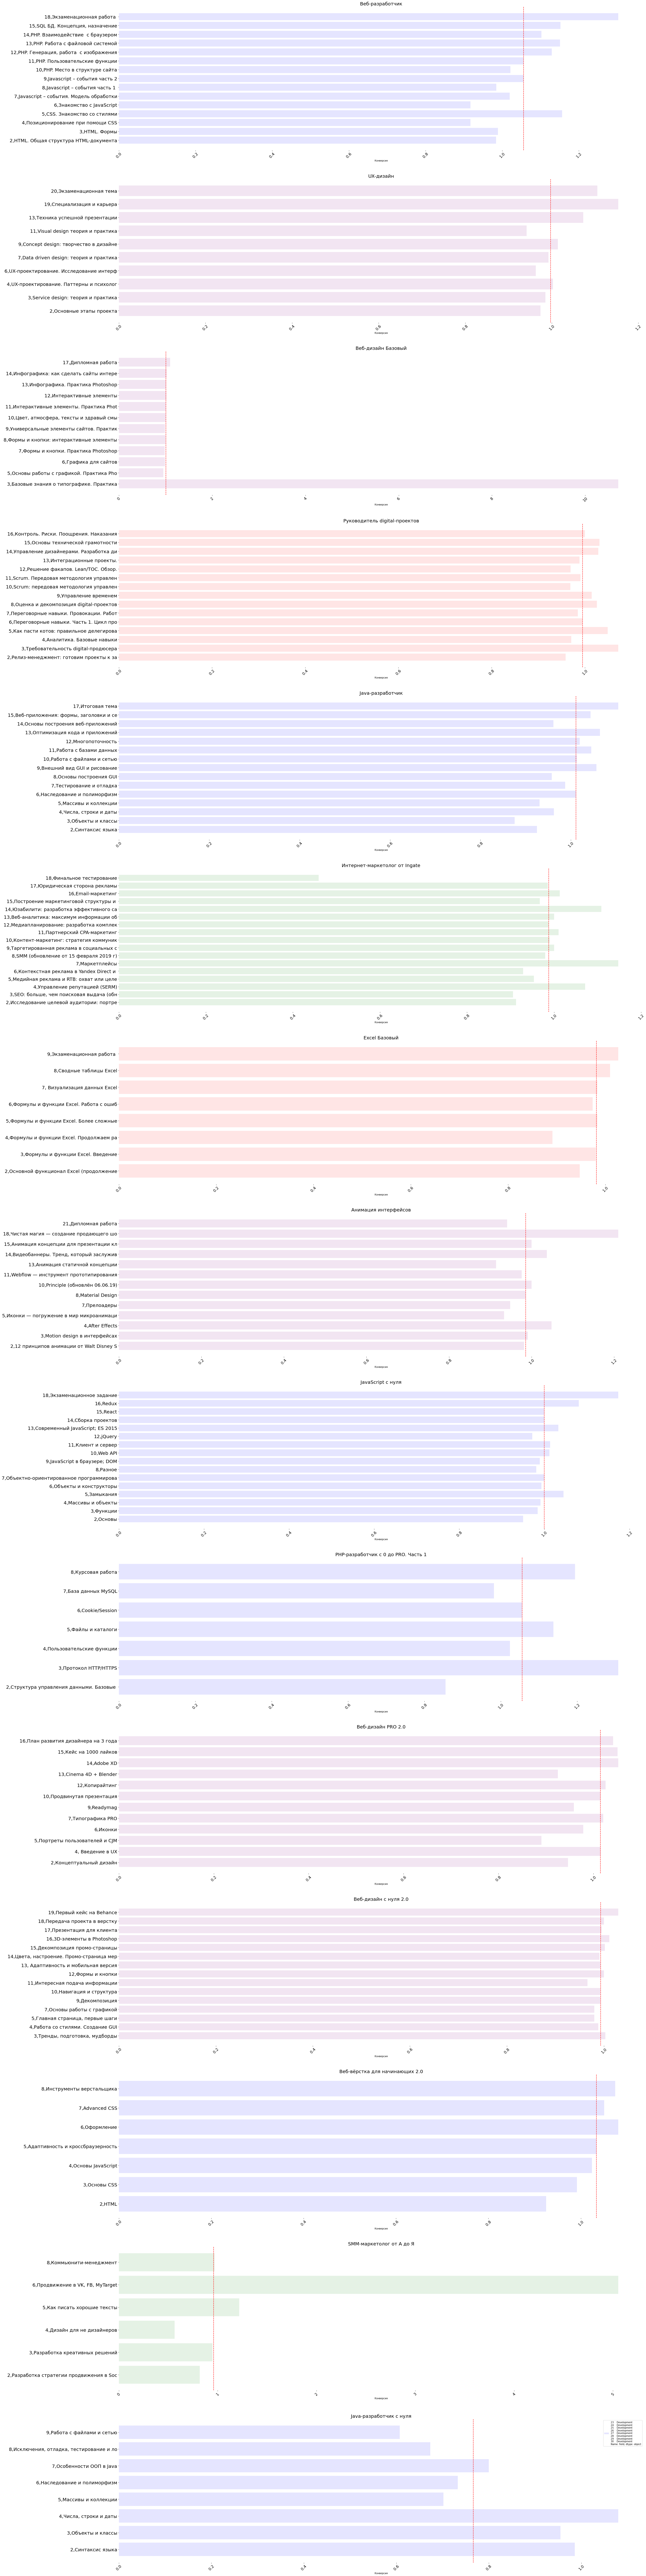

In [ ]:
fig, axs = plt.subplots(nrows = 15, ncols = 1, figsize = (40, 200)) #такой большой figure чтобы надписи на графиках не перекрывали друг друга
titles = df_homework.groupby('title').min()['date'].sort_values().index.to_list()

for n, title in enumerate(titles):
  data = df4.reset_index()[df4.reset_index()['title'] == title][['module', 'conversion', 'color', 'field']]
  ax = axs[n]
  median=data['conversion'].median()
  ax.axvline(median, color='r', linestyle='--')
  ax.barh(data['module'], data['conversion'],  alpha = 0.1, color = data['color'],  label=data['field'])




  ax.set_title(f'{title}', fontsize=20)
  ax.set_xlabel('Конверсия')
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_size(16)
  for tick in ax.get_yticklabels():
    #tick.set_rotation(45)
    tick.set_size(20)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
ax.legend()

## 4. На основании рассчитанных значений сделаем аналитический вывод.

Если брать курсы целиком, а не отдельные модули, то средняя конверсия практически на всех курсах приближается к единице, это очень хороший показатель, большинство курсов не нуждается в доработке.
Проблемными остаются только курсы "Java-разработчик с нуля" и "Веб-дизайн базовый", т.к. эти курсы имеют среднюю конверсию немногим больше 0,8.
Если же говорить об отдельных модулях, то следует обратить внимание на первый модуль с домашней работой в курсе "Веб-дизайн базовый", т.к. конверсия при переходе с него на следующий превышает 1000%. Это значит, что люди, по какой-то причине пропускают этот модуль.
В курсе "интернет маркетинг от Ingate" необходимо доработать модуль 18 "Финальное тестирование", поскольку его проходит лишь половина тех, кто завершил предыдущий.
Курс "PHP-разработчик с 0 до PRO часть 1" содержит проблемный модуль "Структура управления данными".
В курсе "SMM-маркетинг от А до Я" невероятный ажиотаж вызывает модуль "Продвижение в VK, FB, MyTarget", вероятно, стоит проработать возможности распостранения этого спроса и на другие модули.
Курс "Java-разработчик с нуля" содержит более половины проблемных модулей, конверсия местами опускается до 0,6.
Остальные курсы подобных модулей не содержат.


# 5. Метрика успеваемости



Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумаем метрику успеваемости студента. Выявим таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов.

In [ ]:
df




,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework,start_month_year
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2018-06
1,3b9dce04f32da32763124602557f92a3,2,4,done,2019-03-18 14:23:17.328374+00,2019-03-18 14:54:50.979612+00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2019-03
2,73e17a05355852fe65b785c82c37d1ad,2,4,done,2019-07-09 09:18:46.19862+00,2019-07-11 08:03:09.222385+00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2019-07
3,cc3eb34ae49c719648352c4175daee88,2,4,done,2018-07-27 15:39:17.666629+00,2018-07-27 16:13:55.086871+00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2018-07
4,04ace4fe130d90c801e24eea13ee808e,2,4,done,2019-04-24 18:42:40.272854+00,2019-04-24 18:44:57.507857+00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,2019-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350672,7c46c781a54bf9d17f24b4920df4f7eb,9,14,start,2019-07-03 18:46:02.766878+00,NaN,1a0acf593d0a38155bafdf29e3cba338,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07
350673,56a9cb904c20cd2fcfa8104f87f988a7,9,14,wait,2019-07-09 05:44:55.574679+00,NaN,ed93dfa830d97cf67eb047dd7a4aa181,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07
350674,f6216204f2c65eea37f913cfa5e4eb6a,9,15,done,2019-07-03 09:49:03.510925+00,2019-07-03 18:22:44.796645+00,c21fa1f7fa61d11253e4cc8eeeb03027,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False,2019-07
350675,45289b36f4827d49d9d3757fc9486ca0,9,15,done,2019-07-11 12:18:11.684534+00,2019-07-11 17:46:08.426039+00,4e5f1ba884ba5759c07cf6e942ae5e98,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False,2019-07


Отличить низкую мотивацию от отсутствия базовой подготовки можно было бы только классифицировав модули на простые (требующие только мотивации) и сложные (содержащие задания, для которых нужны дополнительные знания). В доступных нам данных, мы могли бы разделить модули на содержащие домашнее задание и не содержащие такового.
И считать, что студенты, затрудняющиеся в уроках не содержащих домашних работ - имеют недостаточную мотивацию, а те, кто затрудняется именно в домашней работе - либо недостаточную мотивацию, либо изначальную базу.
Хотя, в сущности, в реальности скорее студенты будут иметь сочетание низкой мотивации и недостаточной изначальной подготовки, тем более что недостаточная подготовка может стать причиной низкой мотивации.
Поэтому ограничимся только уроками, имеющими домашние задания.

Теперь подумаем над тем, каких студентов можно считать отстающими.

Просмотр видео мало что говорит об обучении, понимании программы, поэтому будем рассматривать только домашние задания.

Каждый человек имеет свой собственный темп обучения, кроме того кто-то занят на основной работе, может иметь переработки, семейные мероприятия, улететь в отпуск и т.д.
Поскольку речь не идёт о том, чтобы выявить проблемные курсы, а только студентов, то метрики должны быть не абсолютными, а относительными, чтобы сравнивать студентов с их же одногруппниками.
Поскольку мы говорим о живых людях, у всех будут разные результаты, всегда можно будет найти 10, 20 или 50% студентов кто решает медленнее других. Вопрос заключается в том, по какому именно критерию мы будем причислять студентов к проблемным.
Для того чтобы это определить - сначала посмотрим на данные. Сгруппируем все прогрессы по студентам и найдем среднее время выполнения домашнего задания для каждого их них и посмотрим на этот показатель.

Посчитаем время выполнения каждого домашнего задания для каждого прогресса.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype    
---  ------            --------------   -----    
 0   progress_id       350677 non-null  object   
 1   module_number     350677 non-null  int64    
 2   lesson_number     350677 non-null  int64    
 3   status            350677 non-null  object   
 4   start_date        350677 non-null  object   
 5   finish_date       334508 non-null  object   
 6   student_id        350677 non-null  object   
 7   course_id         350677 non-null  object   
 8   title             350677 non-null  object   
 9   field             350677 non-null  object   
 10  module_title      350677 non-null  object   
 11  lesson_title      350677 non-null  object   
 12  lesson_token      350677 non-null  object   
 13  is_video          350677 non-null  bool     
 14  is_homework       350677 non-null  bool     
 15  start_month_year  350677 non-null 

Те, кто еще не закончил домашние работы имеет NaT в графе finish, то эти тянущиеся домашние задания нам очень важно учесть, поэтому заполним пропуски последней датой в данном датасете - 2019, 7, 15 - мы её уже записали в переменную end_date ранее.

In [ ]:
end_date


datetime.datetime(2019, 7, 15, 0, 0)

In [ ]:
df5 = df[df['is_homework'] == True]

In [ ]:
df5['finish_date'].fillna(end_date, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Сначала переведём данные в нужный формат.

In [ ]:
df5['start_date'] = pd.to_datetime(df5['start_date'])
df5['finish_date'] = pd.to_datetime(df5['finish_date'], utc=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df5['time_work'] = df5['finish_date'] - df5['start_date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Удалим отрицательные значения time_work

In [ ]:
df5['time_work']

3555       6 days 20:48:48.362527
3556       1 days 18:22:46.584084
3557       0 days 23:09:36.905202
3558       2 days 05:59:20.939297
3559       0 days 15:59:27.932232
                   ...           
350669   -1 days +23:24:14.359730
350670     4 days 08:40:46.516246
350671    10 days 13:01:04.146115
350672    11 days 05:13:57.233122
350673     5 days 18:15:04.425321
Name: time_work, Length: 54478, dtype: timedelta64[ns]

Нужно отфильтровать отрицательные значения time_work, но, поскольку это формат timedelta их невозможно сравнить с нулём, поэтому переведём ноль в тот же формат, чтобы python мог сравнить.

In [ ]:
df5 = df5[df5['time_work'] > pd.Timedelta(0)]

In [ ]:
df5

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework,start_month_year,time_work
3555,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2018-06,6 days 20:48:48.362527
3556,3b9dce04f32da32763124602557f92a3,1,6,done,2019-03-16 15:28:29.978311+00:00,2019-03-18 09:51:16.562395+00:00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2019-03,1 days 18:22:46.584084
3557,73e17a05355852fe65b785c82c37d1ad,1,6,done,2019-07-02 19:01:15.282595+00:00,2019-07-03 18:10:52.187797+00:00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2019-07,0 days 23:09:36.905202
3558,cc3eb34ae49c719648352c4175daee88,1,6,done,2018-07-25 09:39:56.674653+00:00,2018-07-27 15:39:17.613950+00:00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2018-07,2 days 05:59:20.939297
3559,04ace4fe130d90c801e24eea13ee808e,1,6,done,2019-04-24 18:11:57.823830+00:00,2019-04-25 10:11:25.756062+00:00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2019-04,0 days 15:59:27.932232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350657,56a9cb904c20cd2fcfa8104f87f988a7,9,9,done,2019-07-03 05:03:29.121944+00:00,2019-07-04 07:53:36.550522+00:00,ed93dfa830d97cf67eb047dd7a4aa181,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,2af27d88-eb5a-41fc-8819-5f6e0176f3c9,False,True,2019-07,1 days 02:50:07.428578
350670,f6216204f2c65eea37f913cfa5e4eb6a,9,14,done,2019-07-01 20:06:56.697121+00:00,2019-07-06 04:47:43.213367+00:00,c21fa1f7fa61d11253e4cc8eeeb03027,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07,4 days 08:40:46.516246
350671,45289b36f4827d49d9d3757fc9486ca0,9,14,done,2019-07-01 14:35:47.629736+00:00,2019-07-12 03:36:51.775851+00:00,4e5f1ba884ba5759c07cf6e942ae5e98,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07,10 days 13:01:04.146115
350672,7c46c781a54bf9d17f24b4920df4f7eb,9,14,start,2019-07-03 18:46:02.766878+00:00,2019-07-15 00:00:00+00:00,1a0acf593d0a38155bafdf29e3cba338,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07,11 days 05:13:57.233122


Поскольку time_work имеет специфический формат, посчитаем среднее, указав что это не числа.

In [ ]:
df5[['title', 'student_id', 'time_work']].groupby(['title', 'student_id']).mean(numeric_only=False)

time_work
title                         student_id                                                 
Excel Базовый                 001b192f899a84496be98b41906246fc     1 days 10:35:53.150503
                              006f0189ec657741ee4d53474c7a258d  3 days 22:43:05.452010142
                              0074621b6955733338ab0feb2a9a2100 21 days 20:57:28.486691500
                              0098ca12f73a56dadbf6099389305d80  5 days 20:06:53.325129142
                              0203a4ab8610441e866932fb899ed583    67 days 07:35:39.289320
...                                                                                   ...
Руководитель digital-проектов fca3ef866ec16635ff9a34176747656d 17 days 15:09:25.494234333
                              fd3a3ed82b4e1ea88680494282c4d7ca    47 days 02:13:19.817725
                              ff0f96efc5bc705cd50cda0baa15a879     2 days 11:43:12.395822
                              ff5e8cdf1578fda9a8128520c3c215bb    26 days 07:29:02.478816
                              ff7f326a0547ac061779ea5685aec73b 15 days 21:16:59.386486625

[10702 rows x 1 columns]

Теперь попробуем посмотреть на эти данные на графике.

In [ ]:
df5 = df5[['title', 'student_id', 'time_work']].groupby(['title', 'student_id']).mean(numeric_only=False).reset_index()

Для того чтобы можно было передать данные в matplotlib извлечём число дней из формата  timedelta64[ns] как целые числа.

In [ ]:
df5['time_work'] = df5['time_work'].astype('timedelta64[D]')
df5['time_work'] = df5['time_work'].apply(int)

In [ ]:
df5['time_work']

0         1
1         3
2        21
3         5
4        67
         ..
10697    17
10698    47
10699     2
10700    26
10701    15
Name: time_work, Length: 10702, dtype: int64

In [ ]:
df5

,title,student_id,time_work
0,Excel Базовый,001b192f899a84496be98b41906246fc,1
1,Excel Базовый,006f0189ec657741ee4d53474c7a258d,3
2,Excel Базовый,0074621b6955733338ab0feb2a9a2100,21
3,Excel Базовый,0098ca12f73a56dadbf6099389305d80,5
4,Excel Базовый,0203a4ab8610441e866932fb899ed583,67
...,...,...,...
10697,Руководитель digital-проектов,fca3ef866ec16635ff9a34176747656d,17
10698,Руководитель digital-проектов,fd3a3ed82b4e1ea88680494282c4d7ca,47
10699,Руководитель digital-проектов,ff0f96efc5bc705cd50cda0baa15a879,2
10700,Руководитель digital-проектов,ff5e8cdf1578fda9a8128520c3c215bb,26


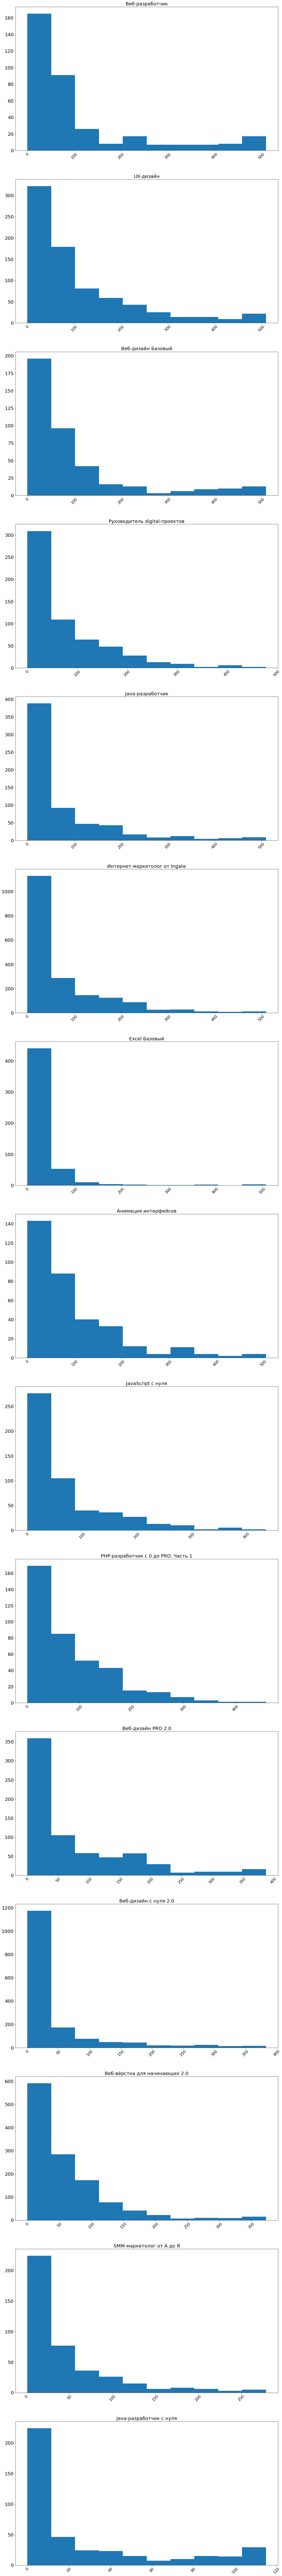

In [ ]:
fig, axs  = plt.subplots(nrows = 15, figsize=(20, 200))

for n, title in enumerate(titles):
  data = df5[df5['title'] == title]
  ax = axs[n]
  ax.hist(data['time_work'])




  ax.set_title(f'{title}', fontsize=20)
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_size(16)
  for tick in ax.get_yticklabels():
    #tick.set_rotation(45)
    tick.set_size(20)


Все диаграммы имеют подобие лесенки, спускающейся от большего количества студентов к меньшему. С выбранной нами размерностью в 100 дней на оси x лесенки получаются довольно крутыми, содержащими иногда 2-3 ступени.
Дальше следует длинное плато из студентов, которые работают над одним домашним заданием более 100 дней. В конце графика присутствует небольшое возвышение. Это люди, которые бросили учёбу, т.к. сложно придумать альтернативное объяснение среднего времени выполнения домашнего задания более 300-сот дней.
Граница между проблемными и не проблемными студентами весьма условна, кроме того, индивидуальна для каждого курса. Тем не менее, мне кажется весьма подходящим провести её там, где кончается лесенка и начинается плато. Эта точка удобна тем, что любая ступень лестницы - это, всё-таки, довольно большая группа людей, и мы можем говорить о том, что такой средний срок выполнения домашней работы довольно распространён.
Но даже более важным является то, что ступени лестницы уменьшаются. Это значит, что из тех, кто не сделал домашнюю работу за 100 дней, многие сделают за 200, из тех, кто не сделал за 200 дней, значительная часть всё-таки уложится в 300 дней.
Таким образом на каждую следующую ступень переходит всё меньше людей - домашние работы постепенно выполняются.
Плато имеет совершенно иной характер, мы видим, что оно находится примерно на одном и том же уровне - то есть человек не выполнивший домашнее задание за 300 дней - скорее всего не выполнит его и за 350, и за 400. Более того - плато как бы накапливается в конце - и мы видим справа возвышение - люди срок выполнения домашних работ которых будет бесконечно увеличиваться.
Исходя из этого, я считаю, что пока студент остаётся на лесенке, сколь бы ни было высоко среднее время выполнения домашней работы, для него есть ещё надежда закончить курс, пусть за большее время чем это позиционируется. Однако те, кто попал на плато уже вряд ли выберутся без чьей-либо помощи, поэтому этих студентов можно считать проблемными.
Отсюда следует, что задача выявить проблемных студентов может быть сведена к отсеиванию тех, кто попал на плато. Уровень попадания на плато разнится для каждого курса, но может быть легко определён визуально - по графику.
Для курса "Веб-разработчик" это 150 дней, "UX-дизайн" - 310 дней, "Веб-дизайн базовый" - 250 дней, "Руководитель digital-проектов" - 350 дней, "Java-разработчик" - 250 дней, "Интернет-маркетолог от Ingate" - 250 дней, "Excel базовый" - 250 дней, "Анимация интерфейсов" - 250 дней, "JavaScript с нуля" - 310 дней, "PHP-разработчик с 0 до PRO часть 1" - 350 дней, "Веб-дизайн PRO 2.0" - 230 дней, "Веб-дизайн с нуля 2.0" - 200 дней, "Веб-вёрстка для начинающих 2.0" - 225 дней, "SMM-маркетолог от А до Я" - 140 дней, "Java-разработчик c нуля" - 60 дней.
Осталось сформировать список студентов по этим критериям.

In [ ]:
slowly_students_list = []

Список курсов мы уже знаем, теперь сопоставим им в соответствие список с ключевым количеством дней.

In [ ]:
titles

['Веб-разработчик',
 'UX-дизайн',
 'Веб-дизайн Базовый',
 'Руководитель digital-проектов',
 'Java-разработчик',
 'Интернет-маркетолог от Ingate',
 'Excel Базовый',
 'Анимация интерфейсов',
 'JavaScript с нуля',
 'PHP-разработчик с 0 до PRO. Часть 1',
 'Веб-дизайн PRO 2.0',
 'Веб-дизайн с нуля 2.0',
 'Веб-вёрстка для начинающих 2.0',
 'SMM-маркетолог от А до Я',
 'Java-разработчик c нуля']

In [ ]:
days = [150, 310, 250, 350, 250, 250, 250, 250, 310, 350, 230, 200, 225, 140, 60]

In [ ]:
for n, title in enumerate(titles):
  day = days[n]
  slowly_students_list.append(df5[(df5['title'] == title) & (df5['time_work'] >= day)]['student_id'].to_list)

Таким образом список проблемных студентов приведён в slowly_students_list.

In [ ]:
slowly_students_list

[<bound method IndexOpsMixin.tolist of 7914    07d9d40ca2d7355436b22b77d35b3902
 7918    09deceb093770438de49960d063d4707
 7921    0c1e1a9155822ddcb938af2d5174ab68
 7922    0da53c06ca7420aa8121026ac1d33919
 7927    125fdec2301e6ff90d7e5031fd54835d
                       ...               
 8218    e6da4fcd86e195d82a80ad8fb8966ca9
 8221    e9948896334824427cc45027deeb0fc1
 8244    f6ae3f5cd03cf779d03521b81faa4d8b
 8248    f972f0210ccc7bf24abd28abd15d0be6
 8255    ff67d1c23bb6655502db7a5130b560f6
 Name: student_id, Length: 71, dtype: object>,
 <bound method IndexOpsMixin.tolist of 2867    027dfcbaef492dd379f0ba5cd70ac0e6
 2874    039fe04806d468e216b807323bcbc514
 2877    04c8dcd2de68a90072aff60cc6952cb3
 2879    06bbc733bf551582062f56cc210f1357
 2889    0a08e2aafe3a7e88db91eb33f6e58fa4
 2901    0e06650e3133e7f1ee616b910579eebc
 2911    116545254420b26f37815cc895d109a3
 2927    14df4afe8c75412de77f18d9053f5085
 2941    19a51fce64c7f2049c20027b6a802727
 2944    1a4e446142d8bb78e63c8a42687f

##КОНЕЦ